In [8]:
#pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

df = pd.read_csv('Extracted SocialMediaComments/Assignments/25-to-31-July/Meta-Data.csv')

In [7]:
df.head(5)

,Platform,Business Unit,Comment Author,message,Current date,tags,ALL_Categories,message state
0,FaceBook,ADC,Facebook user,السلام عليكم \nبكام الضرس ولاني من مكان بعيد ه...,2023-07-15 22:37:02.419,Hospital / Price,Mixed-Inquiries,Shown comment
1,FaceBook,ADC,سمر محمد,كم السعر,2023-07-18 12:24:37.566,Price,Price-Inquiry,Shown comment
2,FaceBook,ADC,Duaa Mohammed,كم السعر,2023-07-17 19:24:37.566,Price,Price-Inquiry,Shown comment
3,FaceBook,ADC,Abdullah Saeed,السهم الورقي 3600 ايش ايش العمله الورقيه,2023-07-18 11:24:37.566,,General-Inquiry,Shown comment
4,FaceBook,ADC,Abrar Jihad,بكم سعر ٥ اسنان,2023-07-24 01:12:28.011,Price / Doctor Feedback,Mixed-Inquiries,Shown comment


In [8]:
set(df.tags)

{' ',
 'Doctor Feedback',
 'Doctor Feedback / Insurance Feedback / Reception',
 'Doctor Feedback / Price',
 'Hospital',
 'Hospital / Doctor Feedback',
 'Hospital / Doctor Feedback / Price',
 'Hospital / Insurance Feedback / Reception',
 'Hospital / Price',
 'Hospital / Price / Reception',
 'Hospital / Reception',
 'Insurance Feedback / Price / Reception',
 'Insurance Feedback / Reception',
 'Insurance Feedback / Reception / Doctor Feedback',
 'Insurance Feedback / Reception / Hospital',
 'Price',
 'Price / Doctor Feedback',
 'Price / Hospital',
 'Price / Insurance Feedback / Reception',
 'Price / Reception',
 'Price / WaitTime / Doctor Feedback',
 'Reception',
 'Reception / Hospital / Doctor Feedback / Price / Insurance Feedback',
 'Reception / Hospital / Price / Insurance Feedback / WaitTime',
 'Reception / Insurance Feedback',
 'Reception / Price / Insurance Feedback / Hospital',
 'WaitTime',
 'WaitTime / Appointment Feedback',
 'WaitTime / Hospital',
 'WaitTime / Hospital / Doctor F

In [15]:
possible_cats = ['Hospital','Price','Reception','Insurance Feedback'#,'Appointment Feedback'
                 ,'WaitTime','Doctor Feedback']
count_cats_bu = {}

for bu_name in set(df['Business Unit']):
    df_bu = df[df['Business Unit']==bu_name]
    df_bu = df_bu[df_bu['ALL_Categories'] == 'Negative-Feedback']
    count_cats = {item: 0 for item in possible_cats}

    for i in range(len(df_bu)):
        for cat in possible_cats:
            if cat in df_bu.tags.iloc[i]:
                count_cats[cat] +=1
    count_cats_bu[bu_name] = count_cats

In [16]:
count_cats_bu

{'AKW': {'Hospital': 3,
  'Price': 0,
  'Reception': 1,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 0},
 'AHC': {'Hospital': 4,
  'Price': 0,
  'Reception': 0,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 1},
 'Andalusia_Egypt': {'Hospital': 0,
  'Price': 0,
  'Reception': 0,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 0},
 'APC': {'Hospital': 2,
  'Price': 2,
  'Reception': 0,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 0},
 'Andalusia_careers': {'Hospital': 0,
  'Price': 0,
  'Reception': 0,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 0},
 'KSA_HomeCare': {'Hospital': 0,
  'Price': 0,
  'Reception': 0,
  'Insurance Feedback': 0,
  'WaitTime': 0,
  'Doctor Feedback': 0},
 'HJH': {'Hospital': 6,
  'Price': 2,
  'Reception': 2,
  'Insurance Feedback': 1,
  'WaitTime': 1,
  'Doctor Feedback': 1},
 'ADC': {'Hospital': 8,
  'Price': 3,
  'Reception': 1,
  'Insurance Feedback': 0,
  'Wait

In [17]:
count_cats = {item: 0 for item in possible_cats}

for i in range(len(df)):
    for cat in possible_cats:
        if cat in df.tags.iloc[i]:
            count_cats[cat] +=1
all_bu_count_cats= count_cats

In [18]:
def least_nonzero_value(dictionary):
    # Filter out elements with a value not equal to zero
    non_zero_items = {k: v for k, v in dictionary.items() if v != 0}

    if not non_zero_items:
        return None  # Return None if there are no non-zero values

    # Find the key-value pair with the least non-zero value
    least_key, least_value = min(non_zero_items.items(), key=lambda x: x[1])

    return least_key, least_value

In [39]:
epsilon = 1e-5
for bu_name,bu_cats in count_cats_bu.items():
    max_key = max(bu_cats, key=lambda key: bu_cats[key])
    try:
        min_key,_ = least_nonzero_value(bu_cats)
        total_sum = sum(bu_cats.values())
        min_val = bu_cats[min_key]/(total_sum+epsilon)*100
        max_out = bu_cats[max_key]/(total_sum+epsilon)*100
    except:
        min_key = None

    print(bu_name,'most common feedback is for the category:',max_key,'with contribution equals to:',f"{max_out:.2f}",'%')
    if min_val >0 and min_val<100 and int(min_val) <= 95 and int(min_val) < max_out-1:
        print(bu_name,'least common feedback is for the category:',min_key,'with contribution equals to:',f"{min_val:.2f}%",'%')
    if total_sum < 10:
        print(f"Note: for this business unit we only have {total_sum} comments in the current analysis.")
        print('\n')

max_key = max(all_bu_count_cats, key=lambda key: all_bu_count_cats[key])
min_key,_ = least_nonzero_value(all_bu_count_cats)
total_sum = sum(all_bu_count_cats.values())
max_val = all_bu_count_cats[max_key]/(total_sum+epsilon)*100
min_val = all_bu_count_cats[min_key]/(total_sum+epsilon)*100

print('\nBusiness Units altogether most common feedback is for the category:',max_key,'with contribution equals to:',f"{max_val:.2f}%")
if min_val>0.0:
    print('Business Units altogether least common feedback is for the category:',min_key,'with contribution equals to:',f"{min_val:.2f}%")


print('\nBusiness units altogether has:')
sorted_items = sorted(all_bu_count_cats.items(), reverse=True)
for key_ in sorted_items:
    key = key_[0]
    print(f'For the category of {key} the contribution is {all_bu_count_cats[key]/(total_sum+epsilon)*100:.2f}%')

AKW most common feedback is for the category: Hospital with contribution equals to: 75.00 %
AKW least common feedback is for the category: Reception with contribution equals to: 25.00% %
Note: for this business unit we only have 4 comments in the current analysis.


AHC most common feedback is for the category: Hospital with contribution equals to: 80.00 %
AHC least common feedback is for the category: Doctor Feedback with contribution equals to: 20.00% %
Note: for this business unit we only have 5 comments in the current analysis.


Andalusia_Egypt most common feedback is for the category: Hospital with contribution equals to: 80.00 %
Andalusia_Egypt least common feedback is for the category: None with contribution equals to: 20.00% %
Note: for this business unit we only have 5 comments in the current analysis.


APC most common feedback is for the category: Hospital with contribution equals to: 50.00 %
Note: for this business unit we only have 4 comments in the current analysis.


An

In [40]:
df_perc = df[df['tags'] != ' ']
df_perc

,Platform,Business Unit,Comment Author,message,Current date,tags,ALL_Categories,message state
0,FaceBook,ADC,Facebook user,السلام عليكم \nبكام الضرس ولاني من مكان بعيد ه...,2023-07-15 22:37:02.419,Hospital / Price,Mixed-Inquiries,Shown comment
1,FaceBook,ADC,سمر محمد,كم السعر,2023-07-18 12:24:37.566,Price,Price-Inquiry,Shown comment
2,FaceBook,ADC,Duaa Mohammed,كم السعر,2023-07-17 19:24:37.566,Price,Price-Inquiry,Shown comment
4,FaceBook,ADC,Abrar Jihad,بكم سعر ٥ اسنان,2023-07-24 01:12:28.011,Price / Doctor Feedback,Mixed-Inquiries,Shown comment
5,FaceBook,ADC,الحياه مشور صعب,Andalusia Dental Centers حضرتك الدرس طلع نظافه...,2023-07-18 12:24:37.566,Reception / Hospital / Doctor Feedback / Price...,Mixed-Inquiries,Shown comment
...,...,...,...,...,...,...,...,...
378,Youtube,ADC,Qwqw Qwqw,بس صوت الدكتور منخفض,NaN,Hospital / Price,Negative-Feedback,Hidden comment
380,Youtube,ADC,Rhrc Dkr,تبع مرحبا مليون مبروك يا ابو محمد وعلى آل محمد...,NaN,Reception / Insurance Feedback,Insurance-Inquiry,Hidden comment
381,Youtube,ADC,ddd ggg,الغبي ضيع أسنانه لانه اختار تركيبة ولم يختار ز...,NaN,Hospital,Negative-Feedback,Hidden comment
382,Youtube,ADC,Be ControL,بسبب اسعاركم الفلكية نويت اسافر مصر وازرع هناك...,NaN,Hospital / Price,Negative-Feedback,Hidden comment


In [41]:
import matplotlib.pyplot as plt

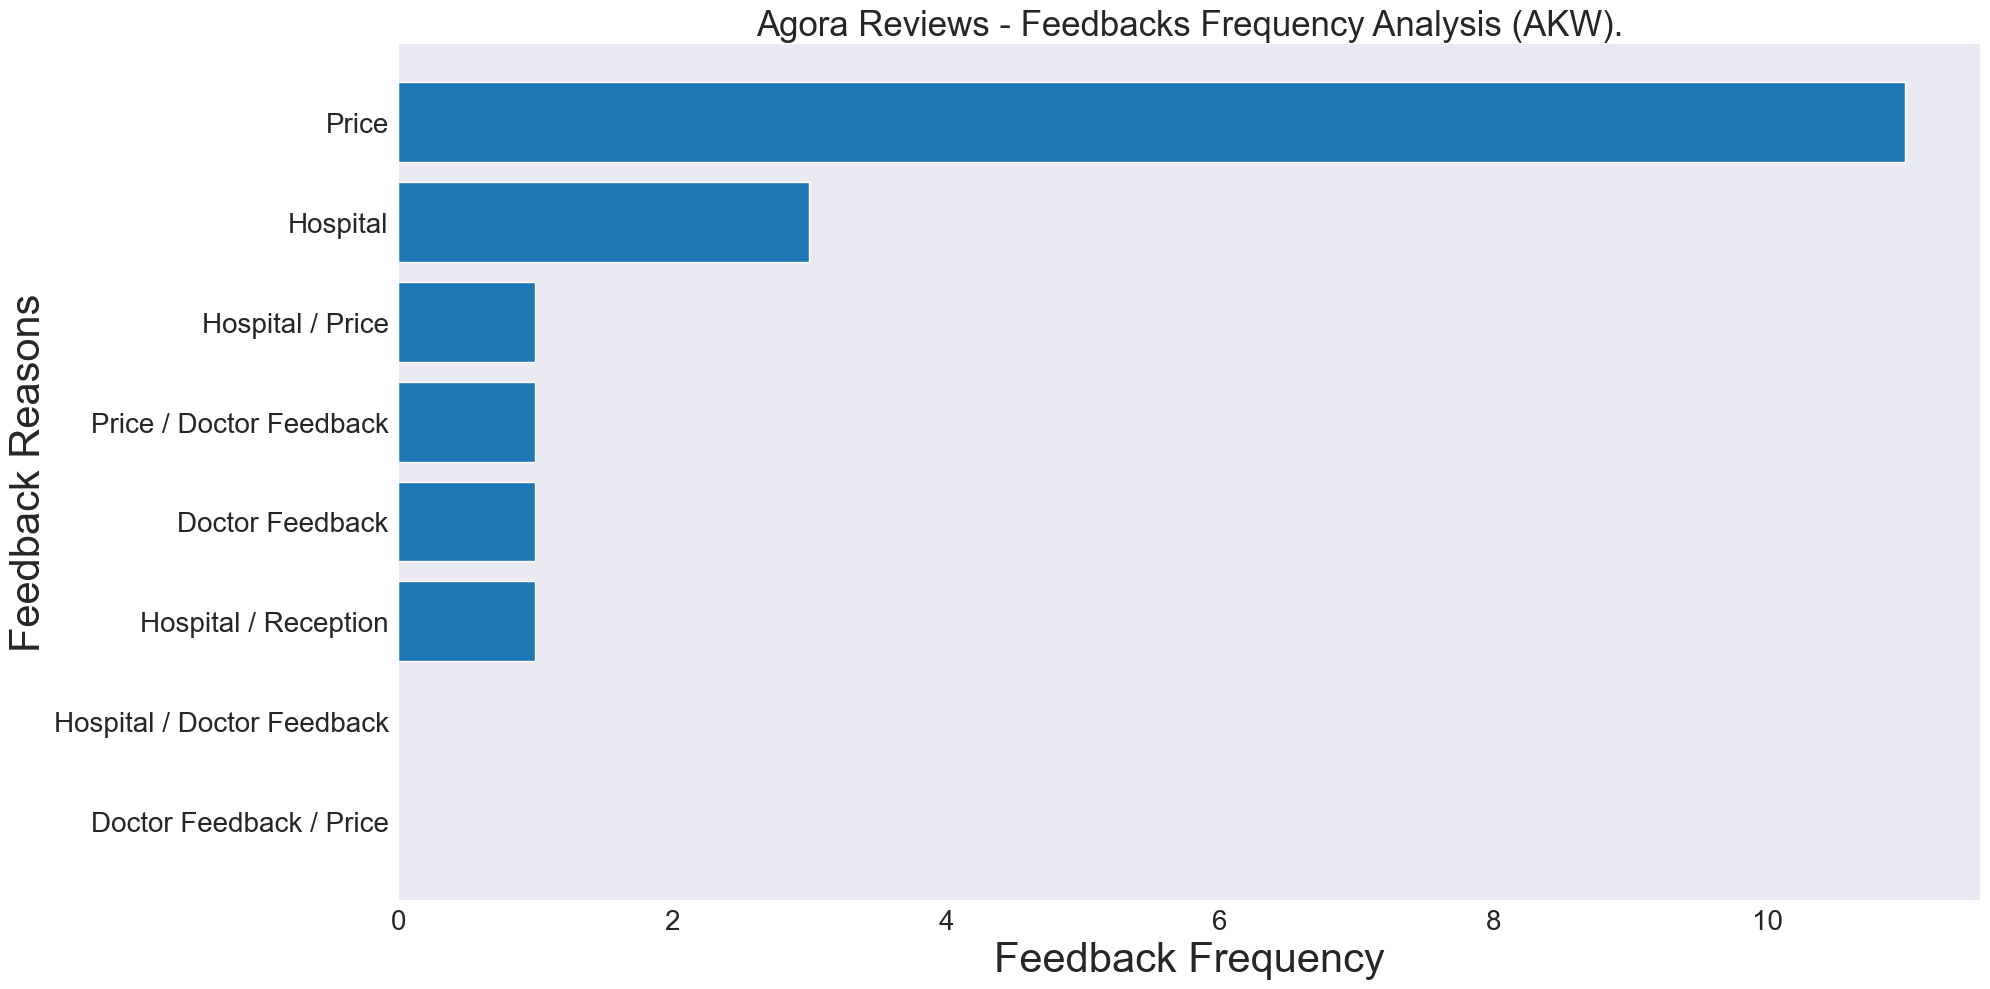

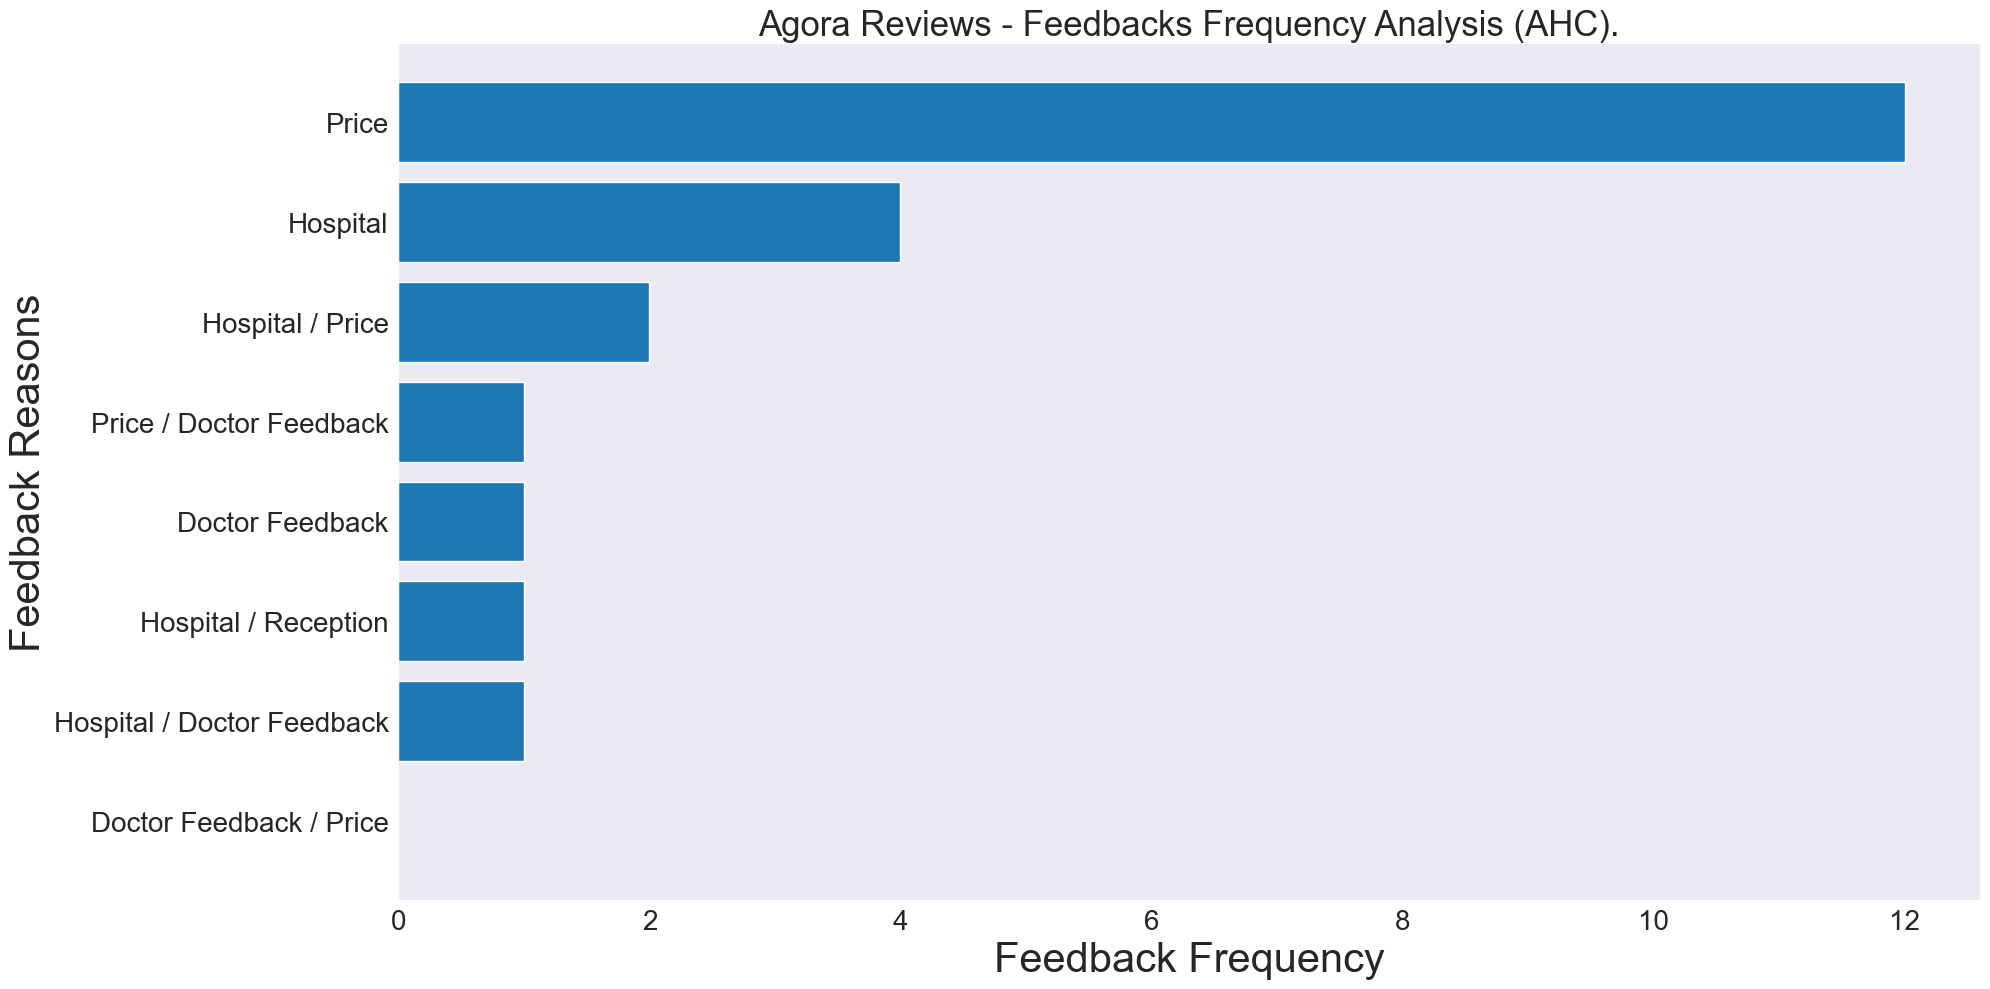

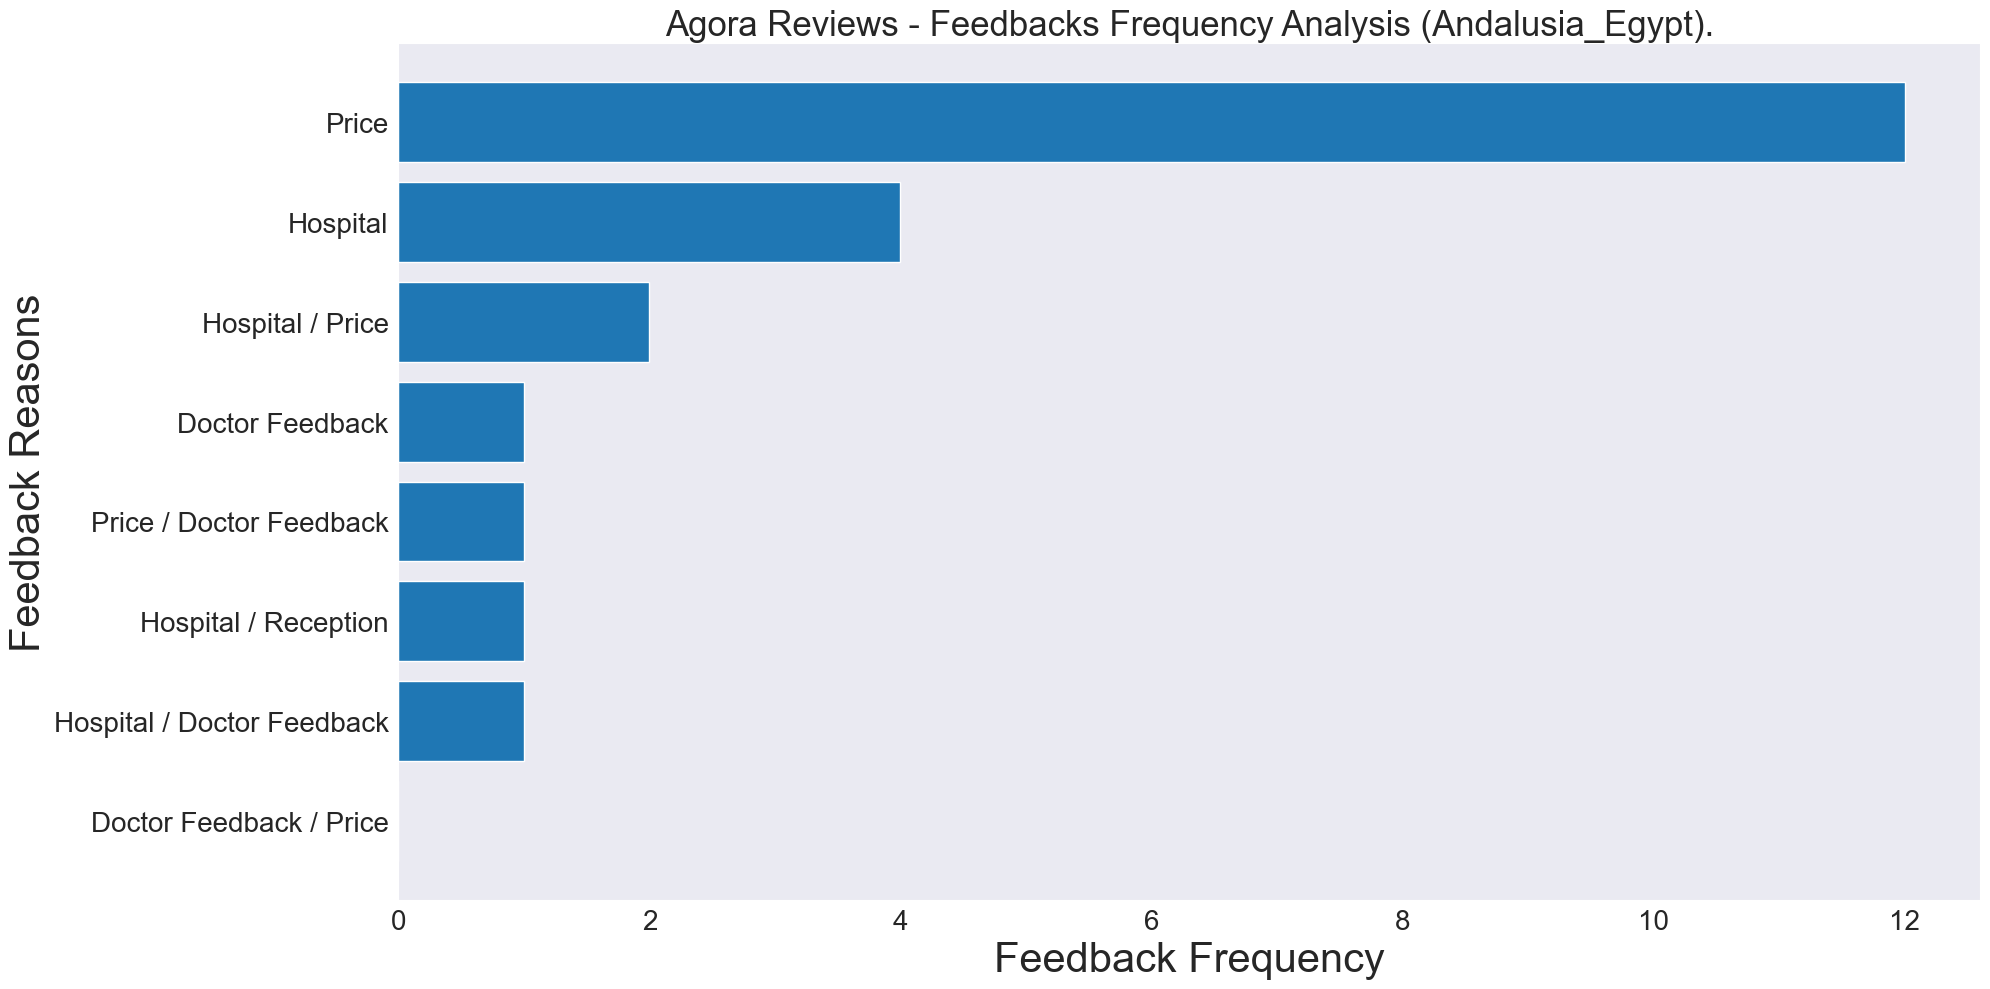

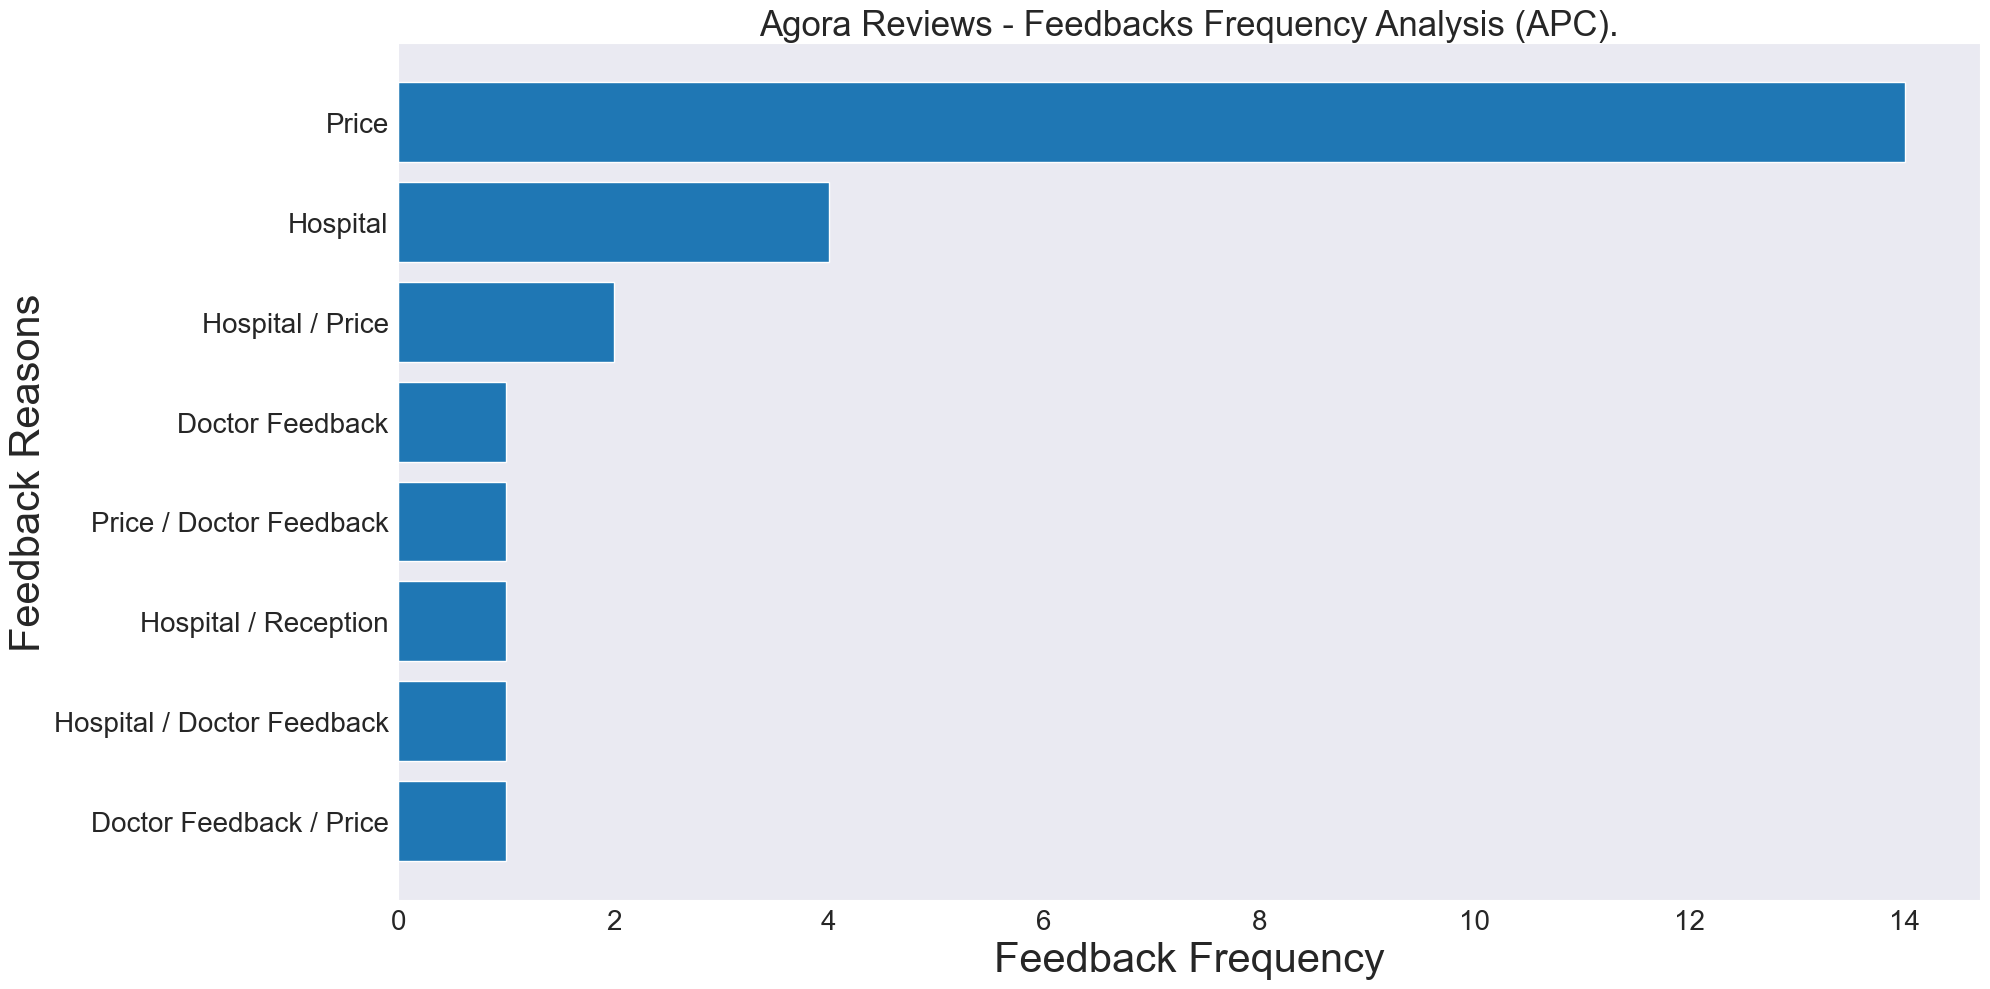

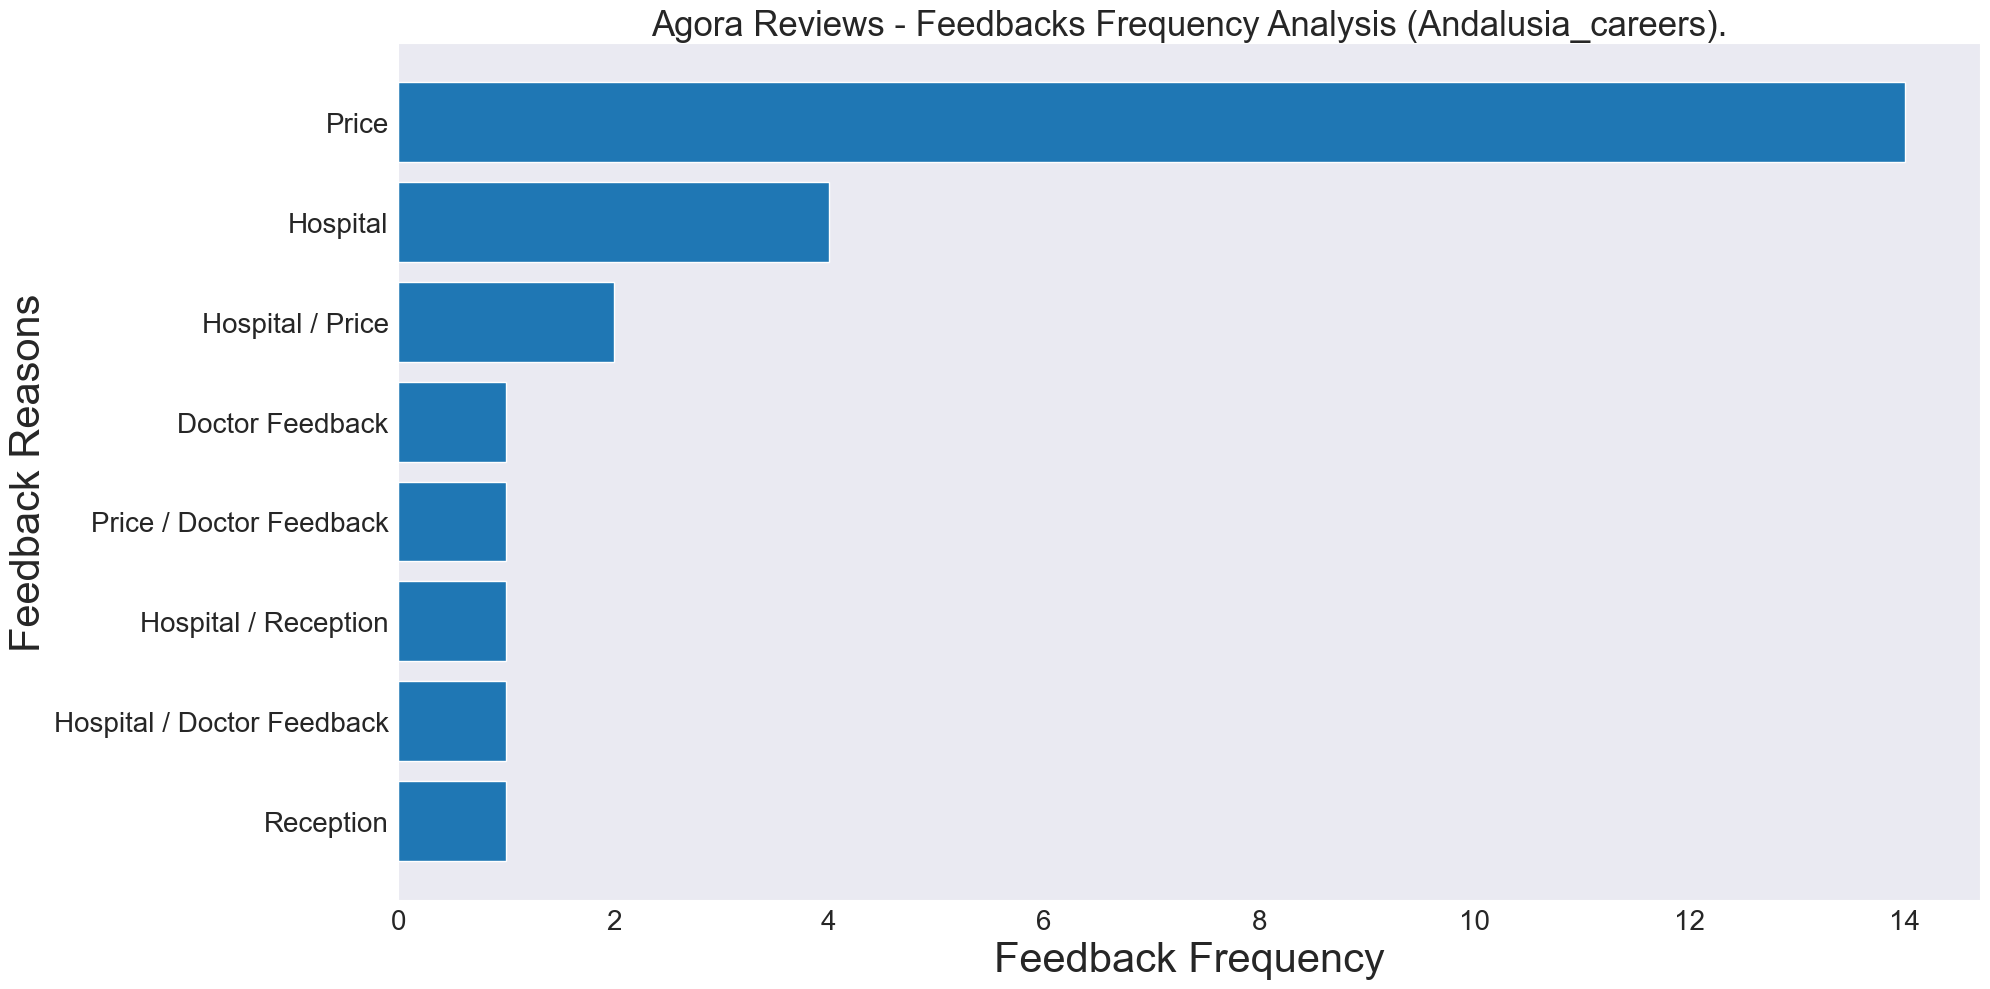

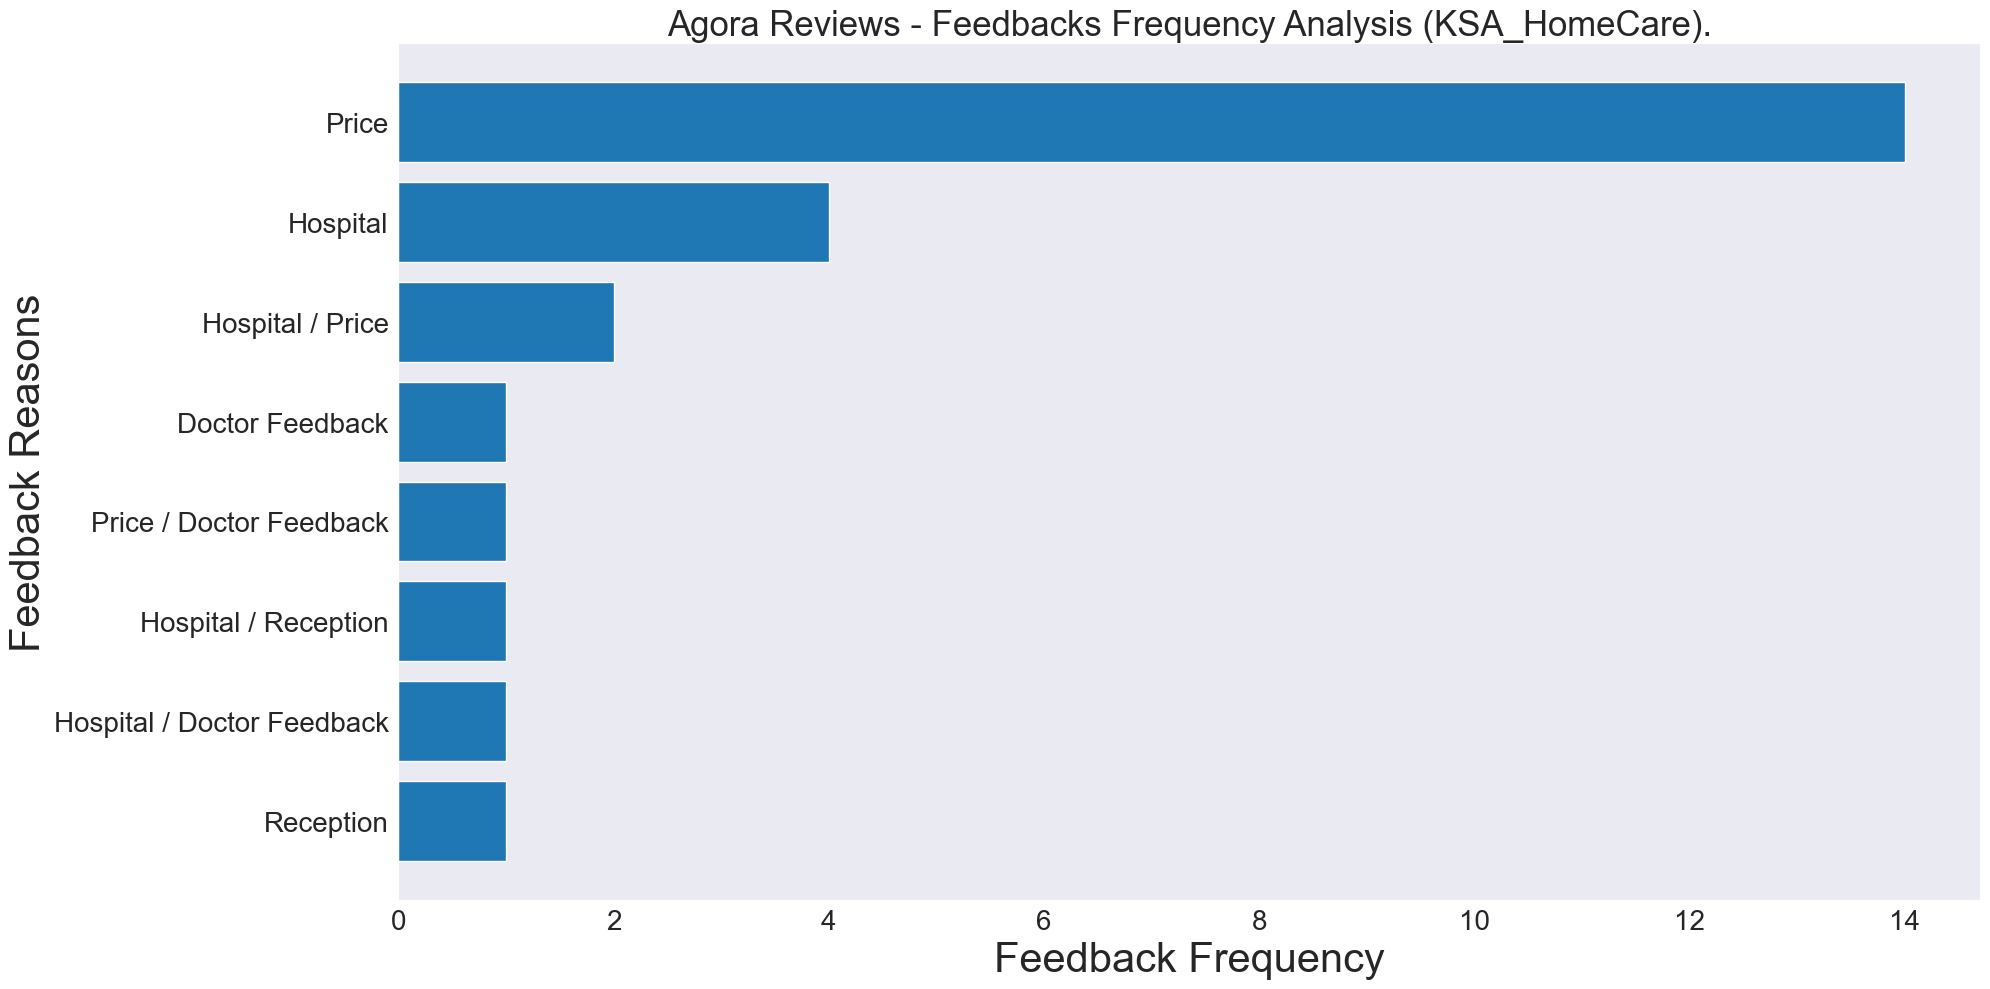

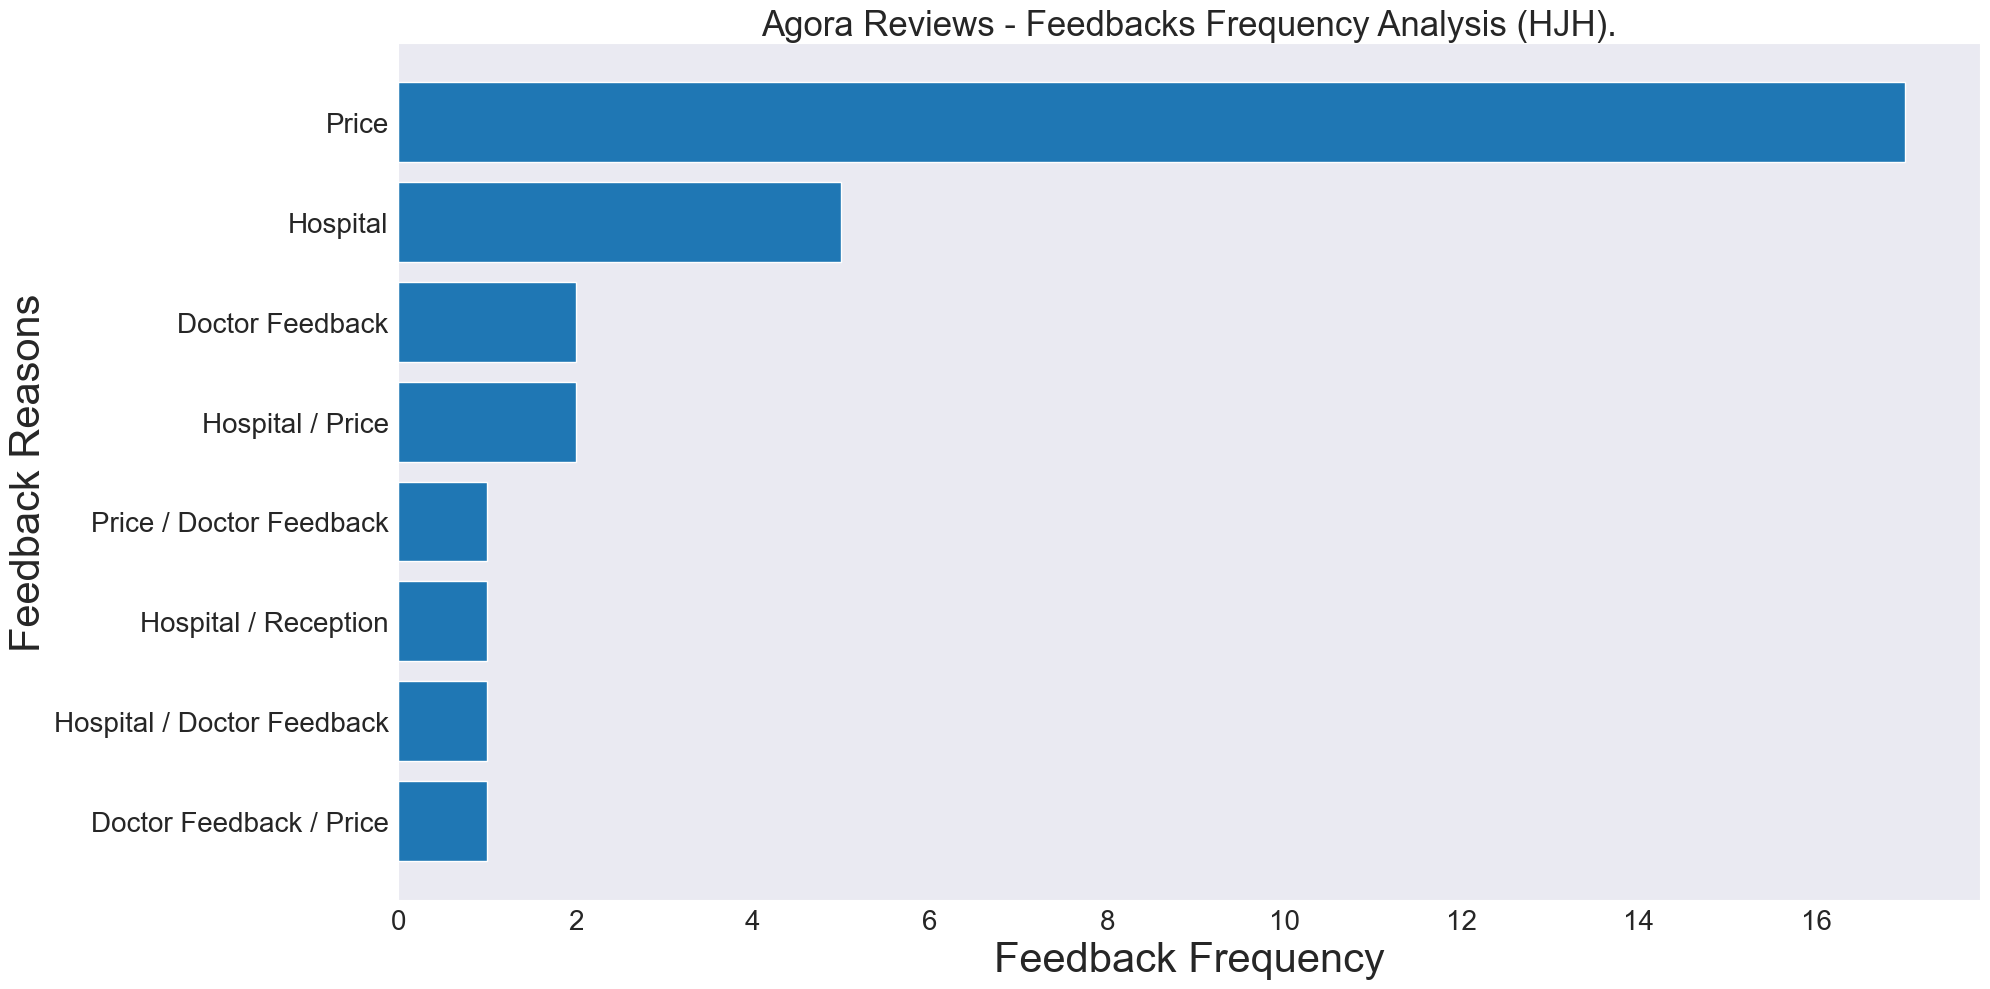

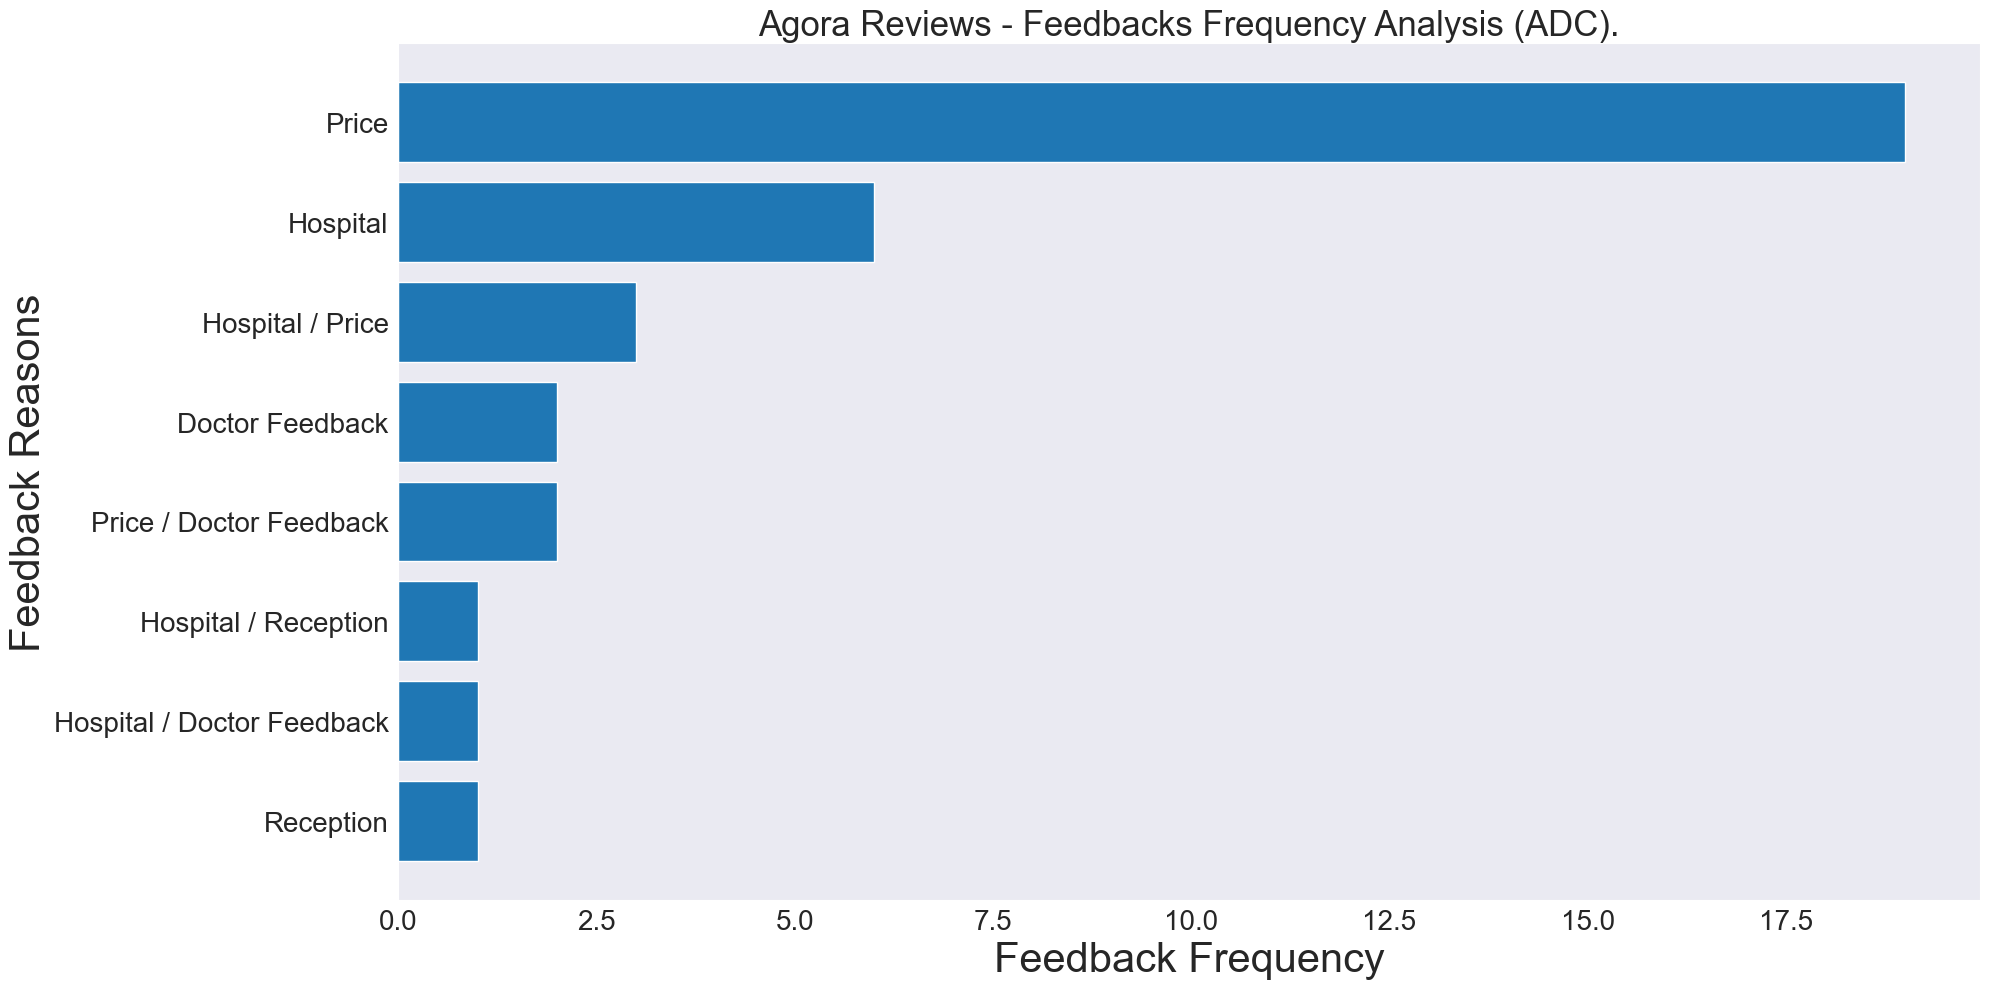

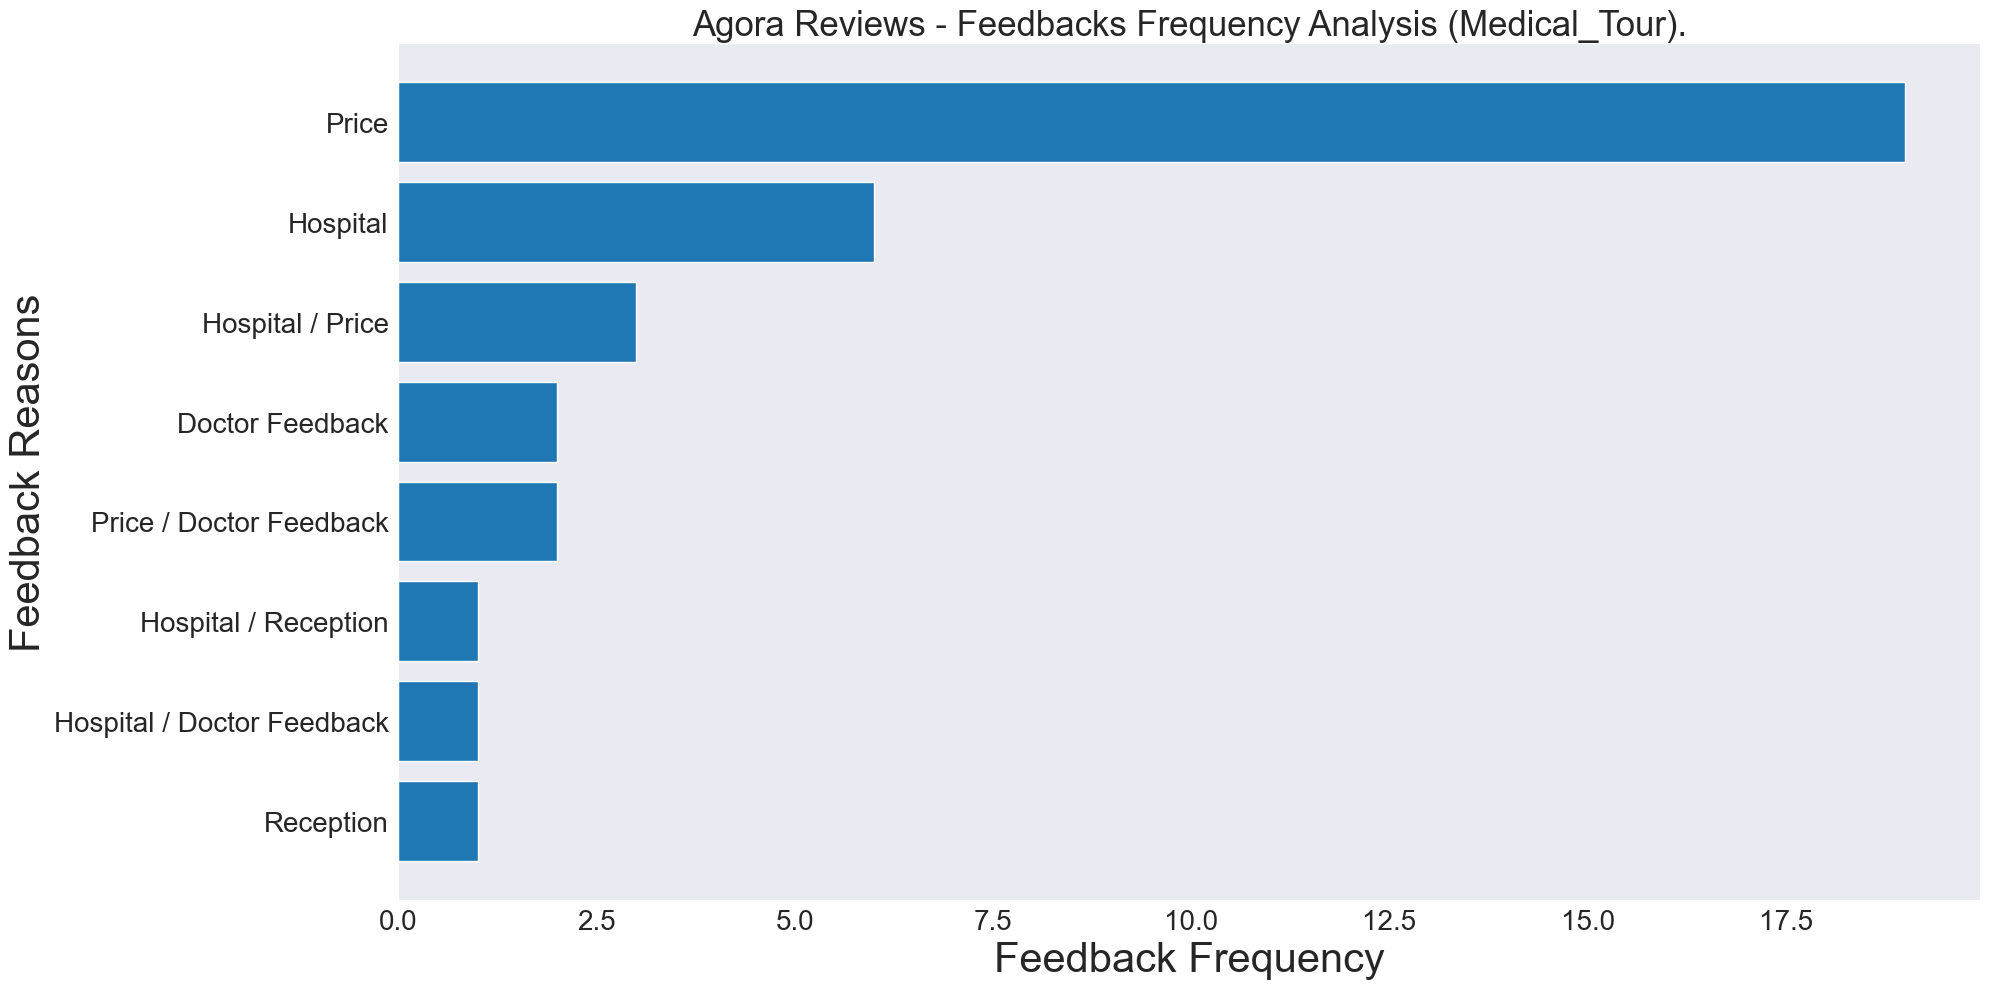

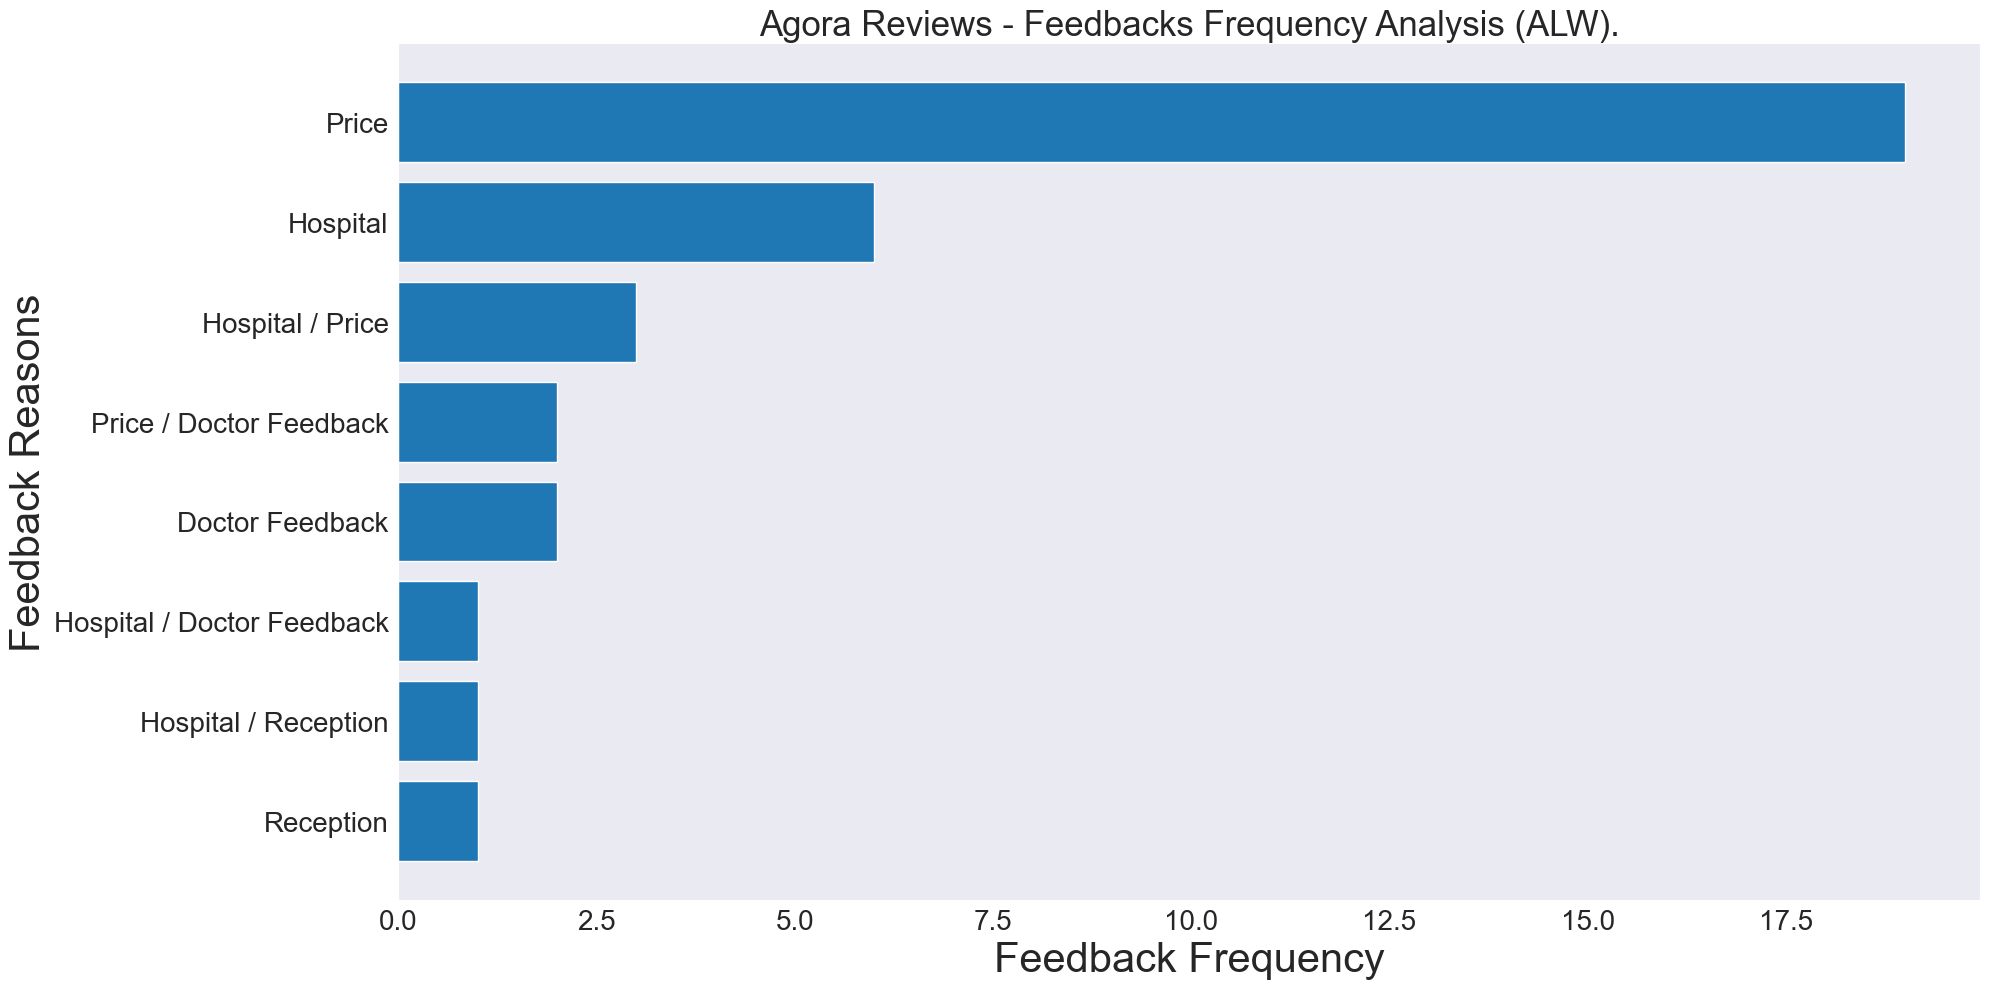

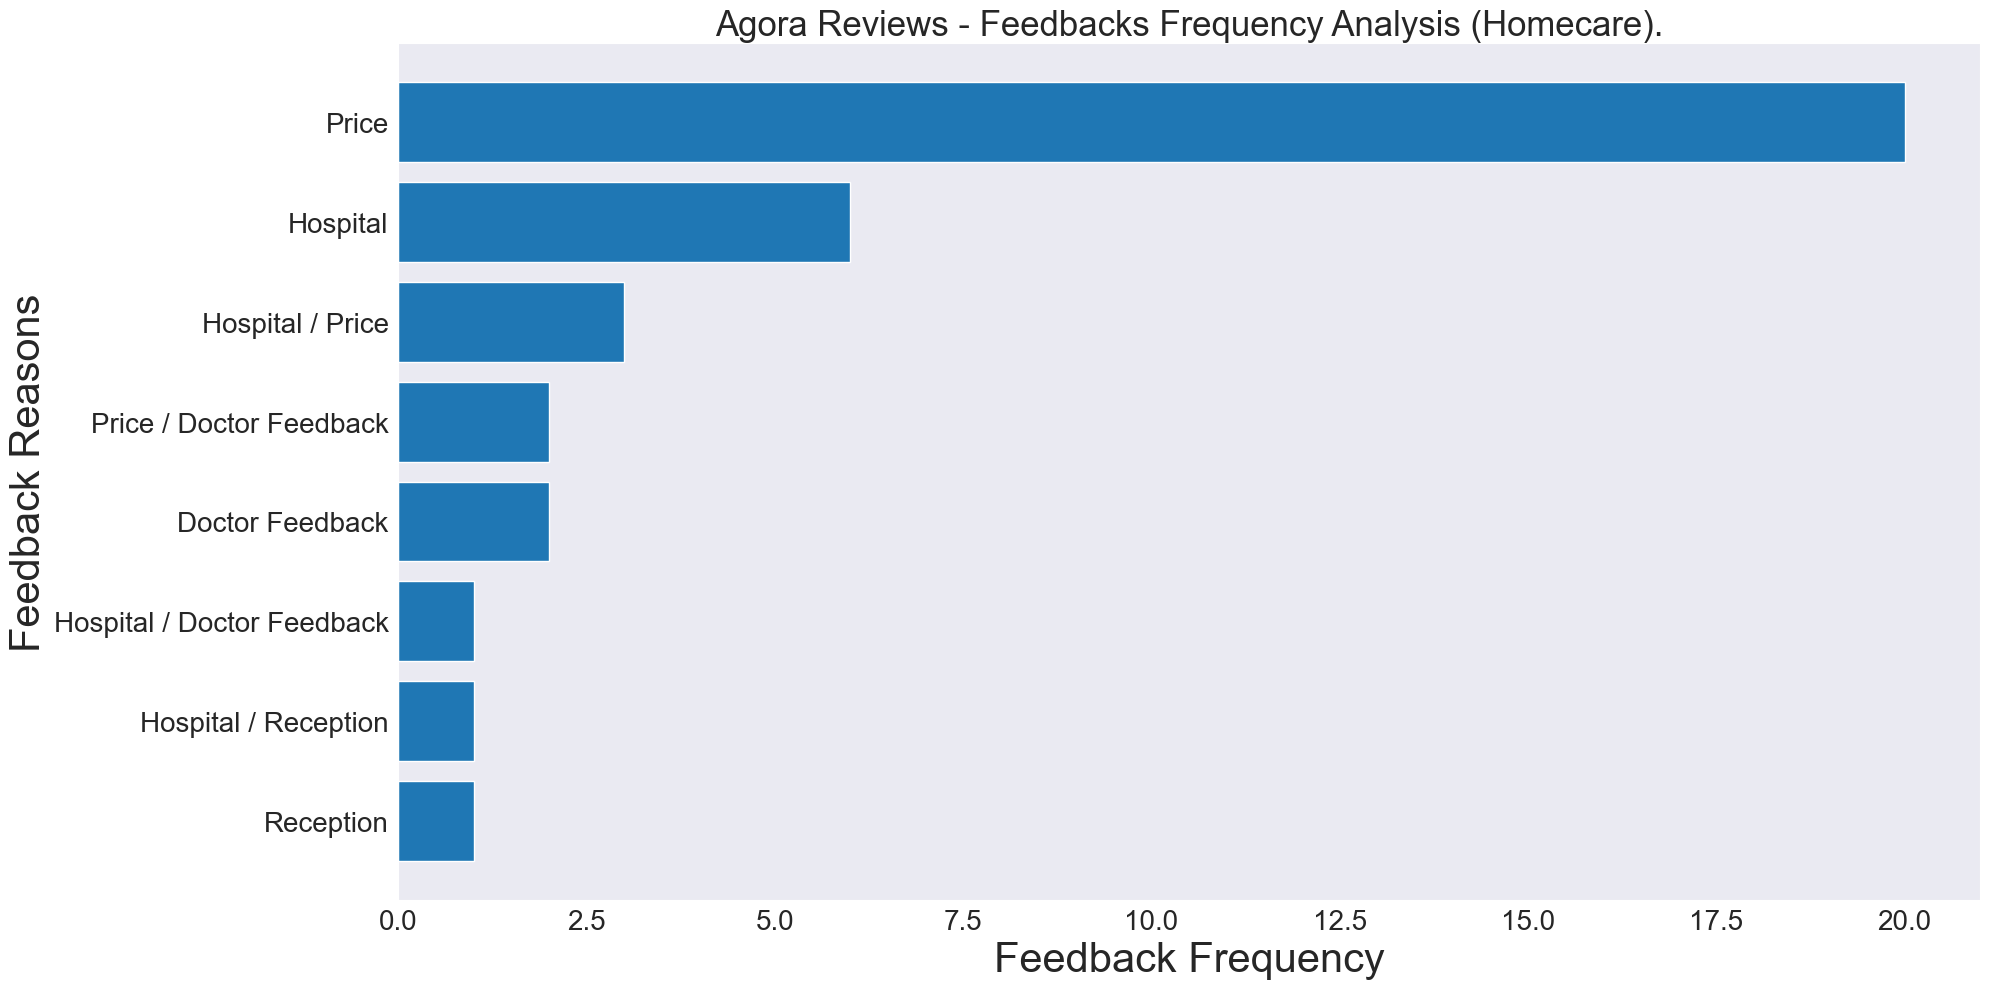

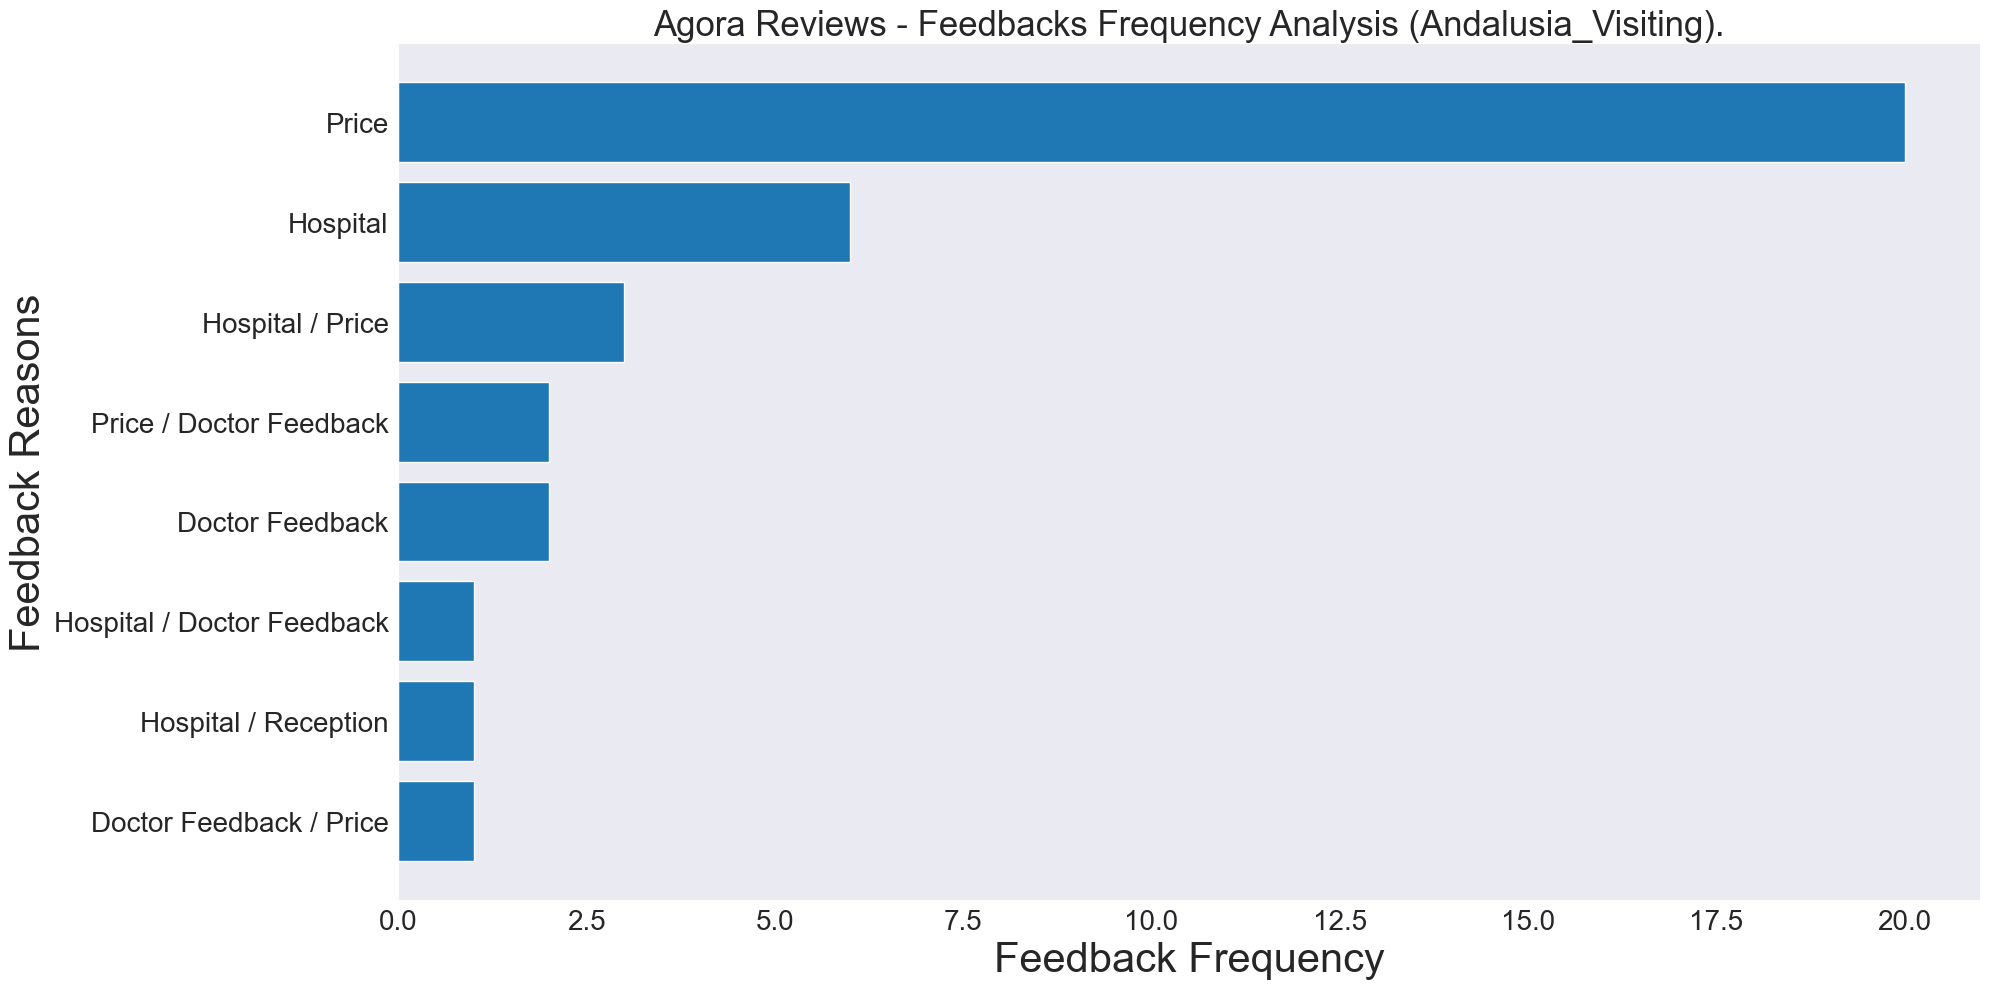

In [52]:
a_c = ['slategray', 'silver','royalblue','darkblue','blue','steelblue','cyan','slateblue','darkslateblue','ivory','peru','khaki', 'violet','orange','yellow']

value_counts = {}
for value in df.tags:
    value_counts[value] = value_counts.get(value, 0) + 1

for bu in set(df_perc['Business Unit'].tolist()):
    a = df_perc[df_perc['Business Unit'] == bu]

    a = a[a['tags'] !='']
    a = a[a['tags'] !=' ']

    a = a[['Business Unit','tags']]
    plt.figure(figsize = (20,10))

    for value in a.tags:
        value_counts[value] = value_counts.get(value, 0) + 1

    values = list(value_counts.keys())
    index_of_element = values.index(' ')
    values.pop(index_of_element)

    counts = list(value_counts.values())
    counts.pop(index_of_element)

    values, counts = zip(*sorted(zip(values, counts), key=lambda x: x[1], reverse=False))
    values2,counts2 = values[-8:],counts[-8:]
    counts2_ = [i//10 for i in list(counts2)]
    plt.barh(values2,counts2_ )

    title = 'Agora Reviews - Feedbacks Frequency Analysis (' + bu + ').'
    plt.title(title,fontsize=25)
    plt.xlabel('Feedback Frequency',fontsize=30)
    plt.xticks(fontsize=20)
    plt.ylabel('Feedback Reasons',fontsize=30)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.grid()
    #for i in range(len(values2)):
    #    plt.text(y=values2[i],x=counts2[i], s = str(counts[i]), ha='center', va='bottom')

    title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Analysis(' + bu + ').png'
    plt.savefig(title)

In [42]:
values

['Hospital / Price',
 ' ',
 'Price',
 'Price / Insurance Feedback / Reception',
 'Reception',
 'Price / Hospital',
 'Hospital',
 'Price / Doctor Feedback',
 'Hospital / Doctor Feedback',
 'Reception / Hospital / Doctor Feedback / Price / Insurance Feedback',
 'Doctor Feedback',
 'WaitTime / Reception / Hospital',
 'WaitTime / Hospital / Doctor Feedback',
 'Price / Reception',
 'Hospital / Reception',
 'Reception / Insurance Feedback',
 'Hospital / Price / Reception',
 'WaitTime / Hospital',
 'WaitTime / Price / Hospital',
 'Insurance Feedback / Reception',
 'WaitTime',
 'WaitTime / Appointment Feedback',
 'Reception / Price / Insurance Feedback / Hospital',
 'Reception / Hospital / Price / Insurance Feedback / WaitTime',
 'Insurance Feedback / Reception / Hospital',
 'Insurance Feedback / Reception / Doctor Feedback',
 'Price / WaitTime / Doctor Feedback']

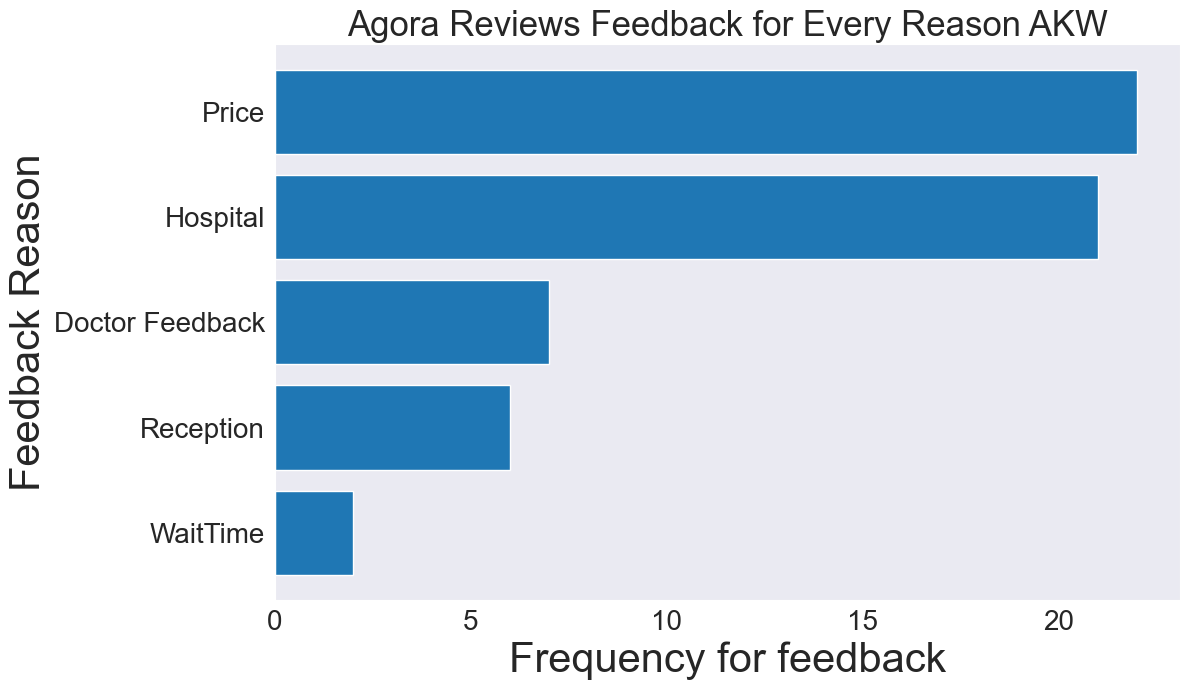

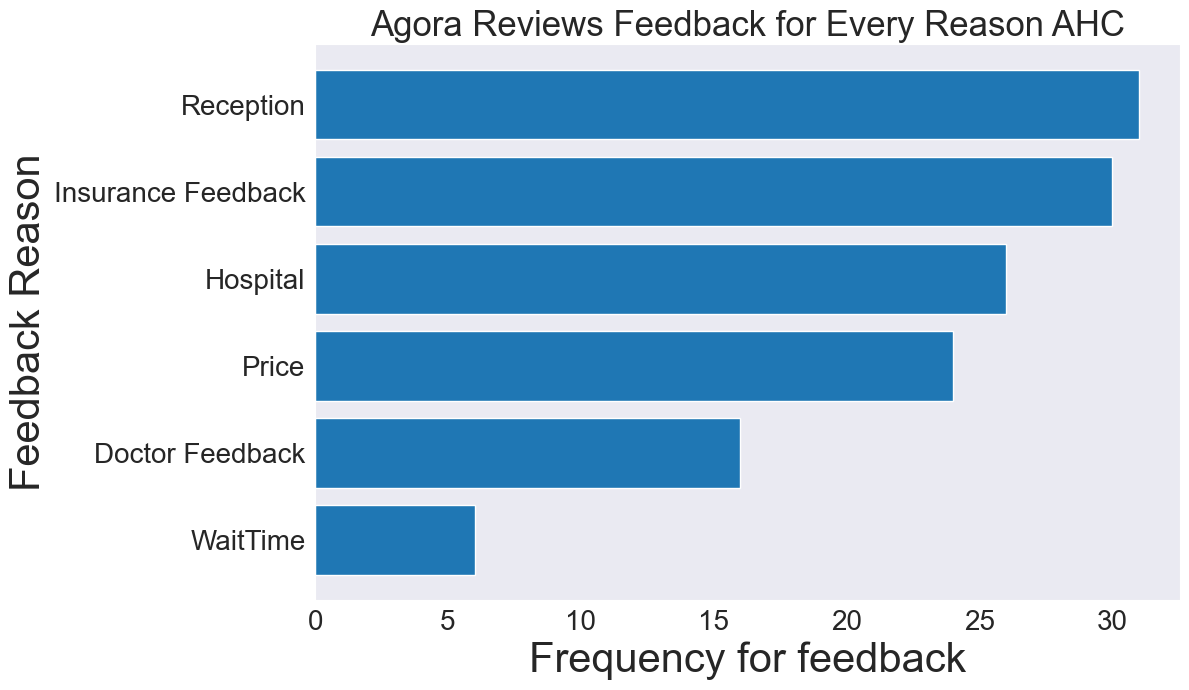

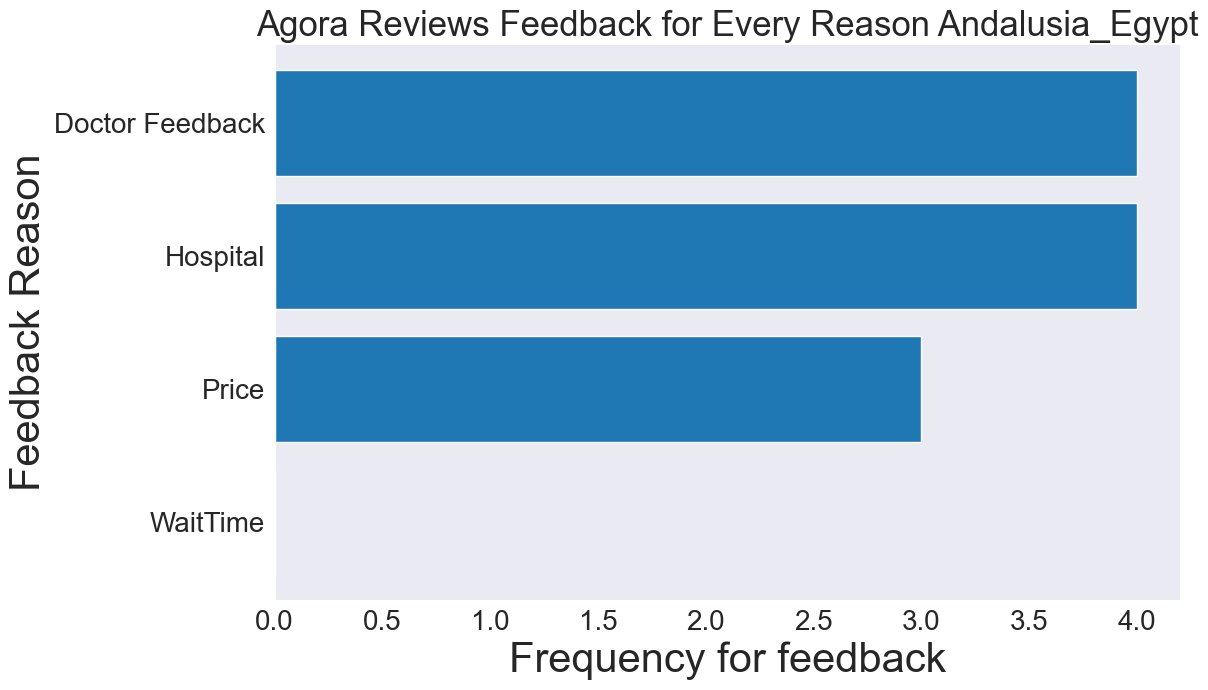

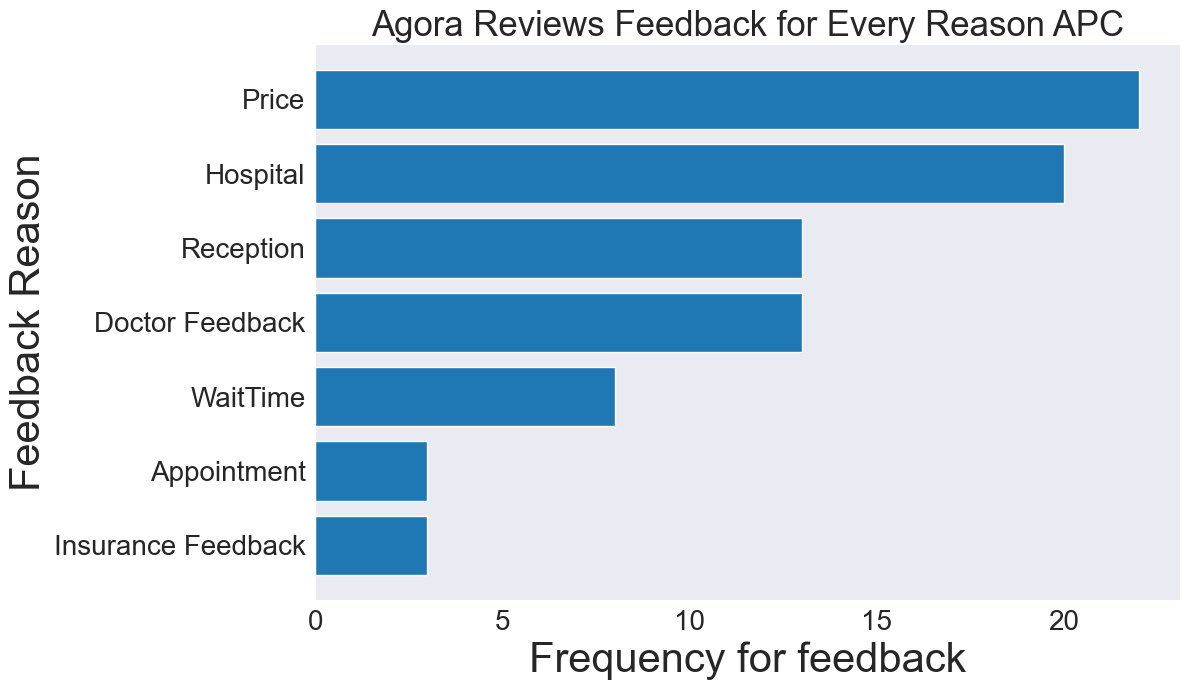

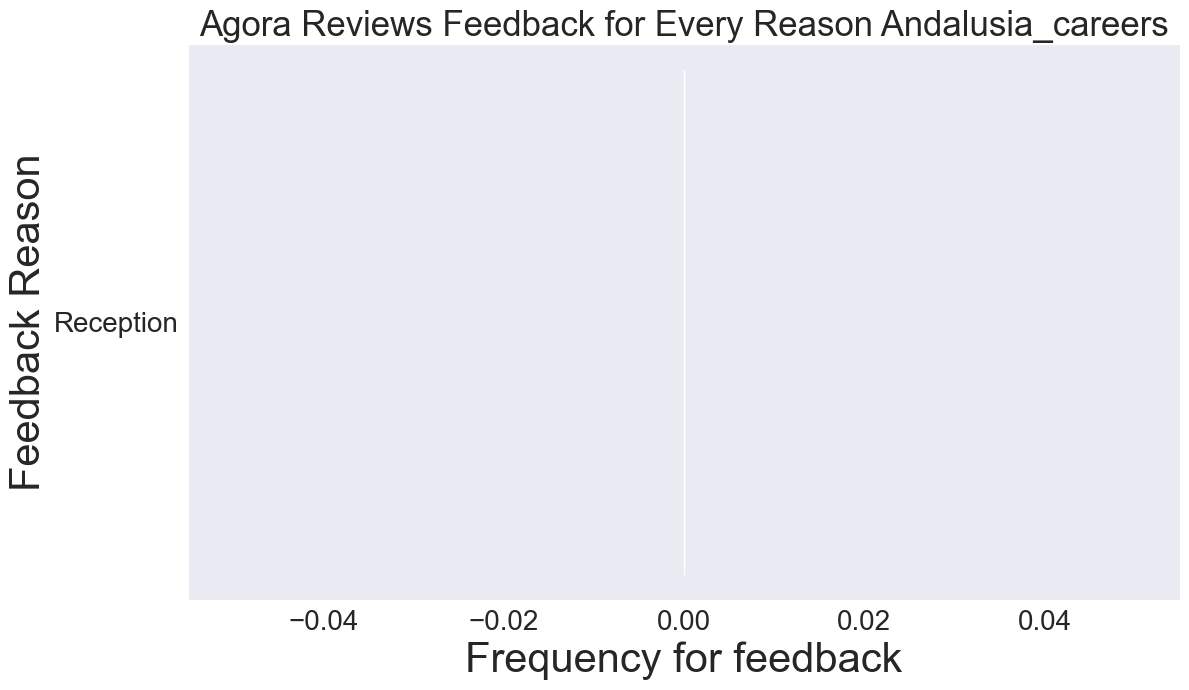

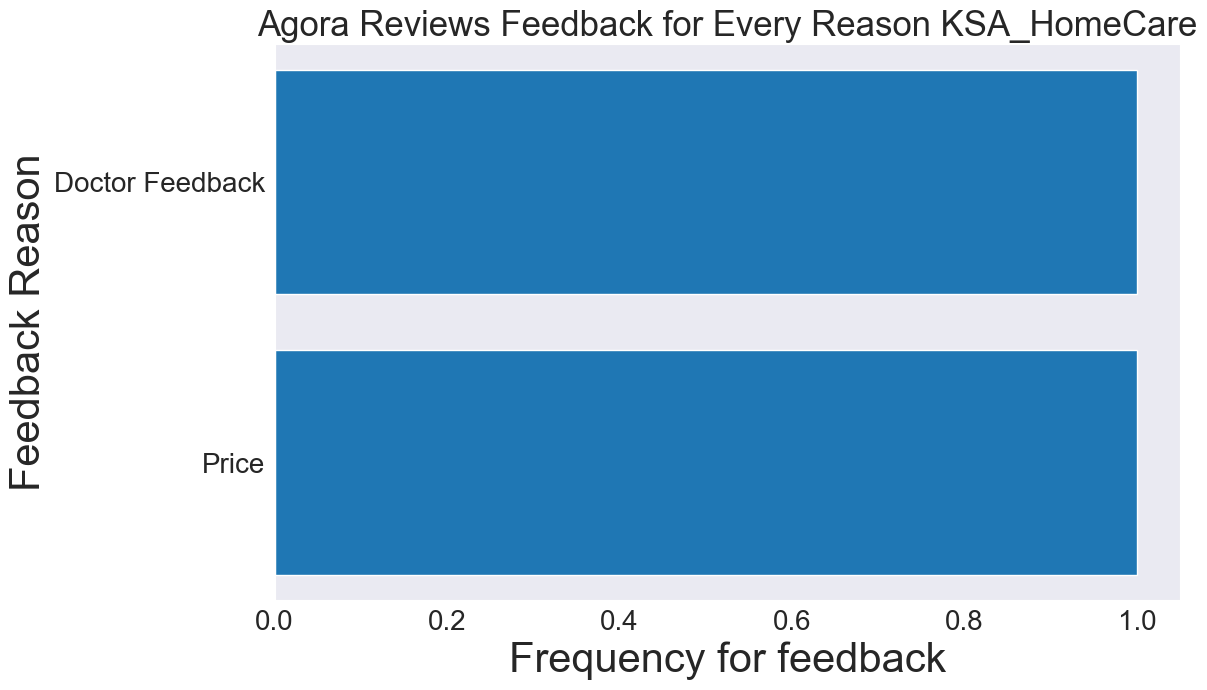

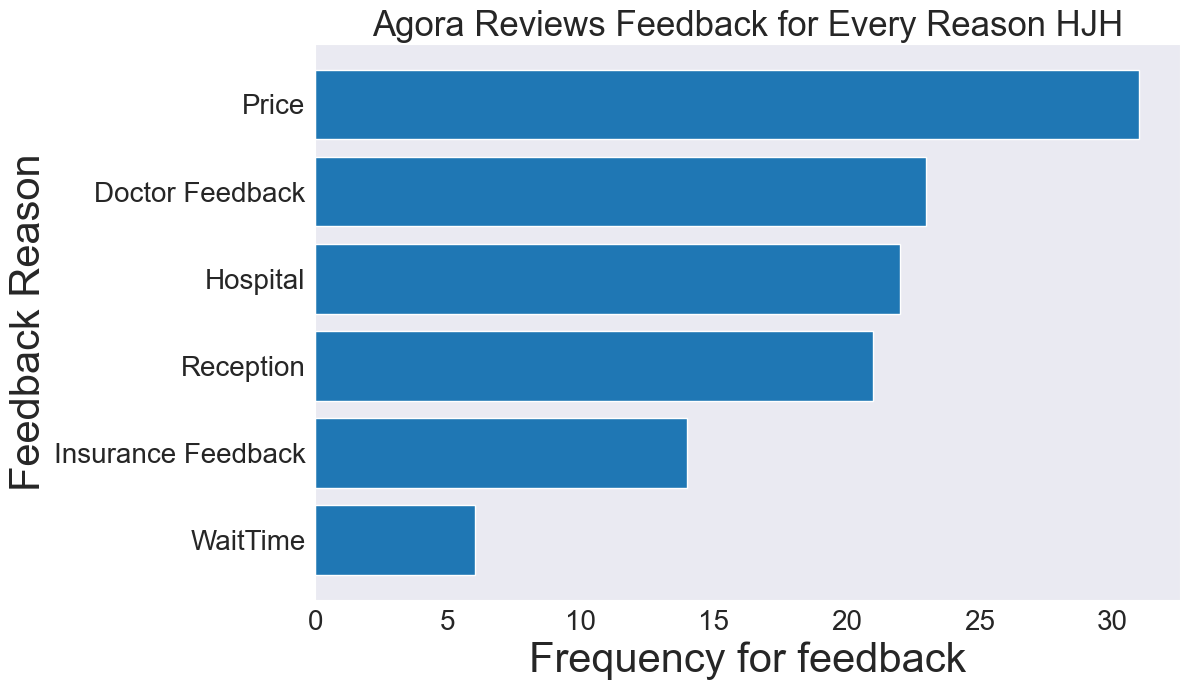

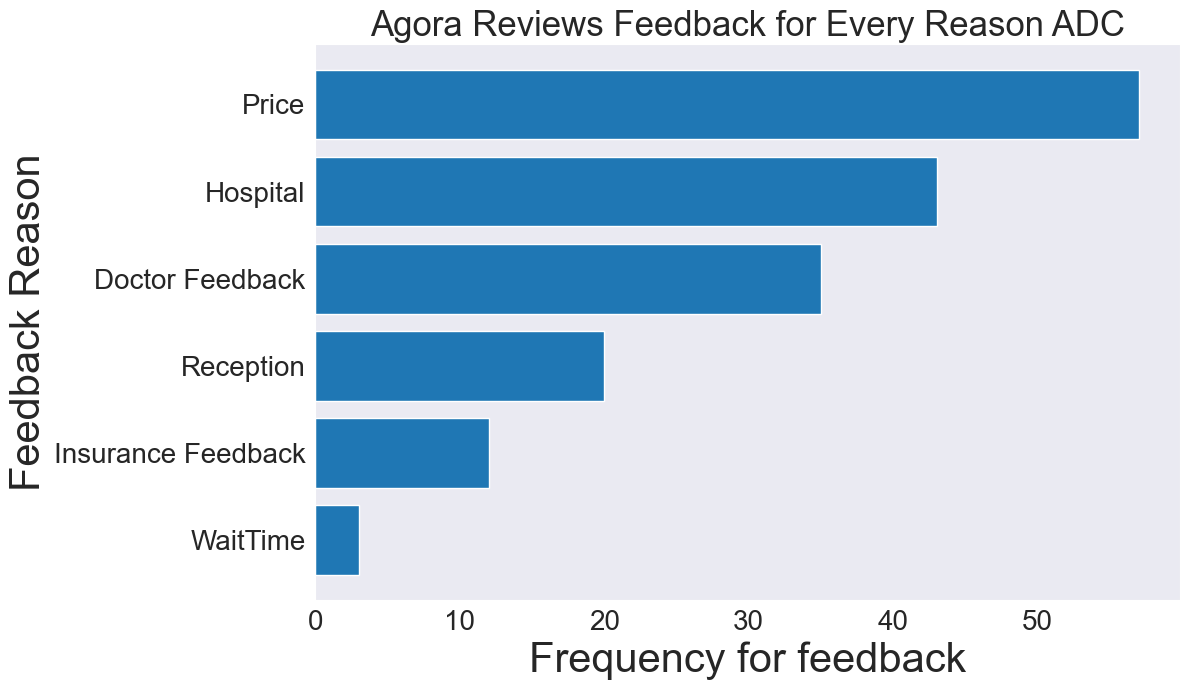

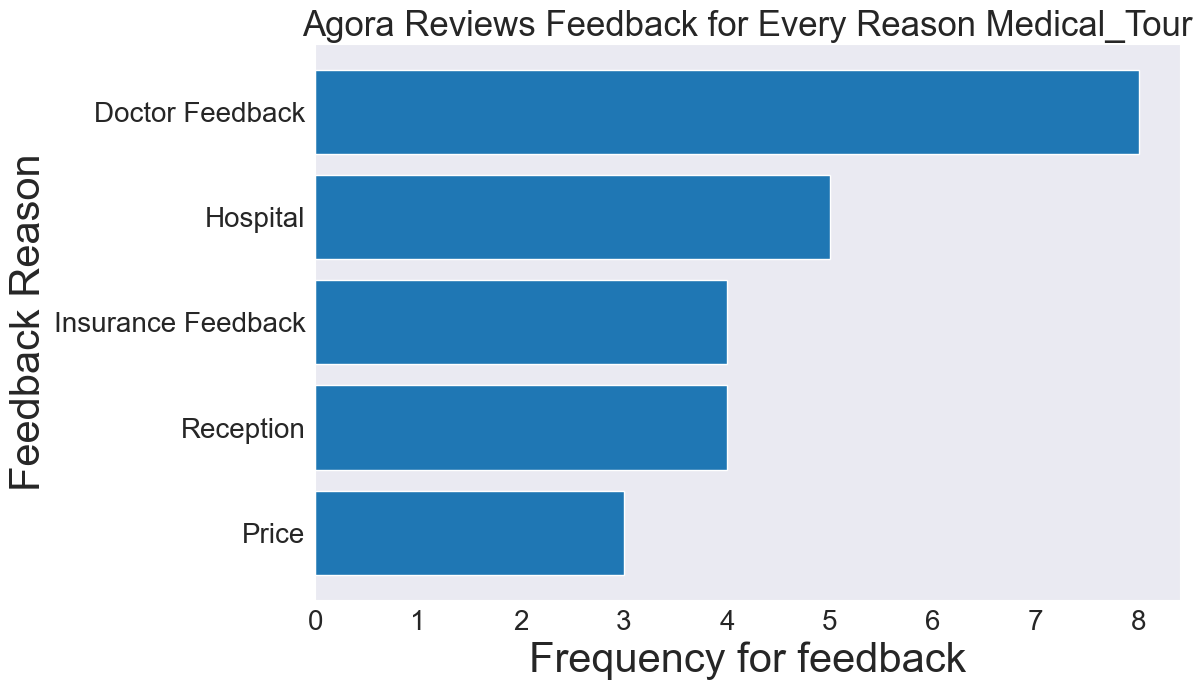

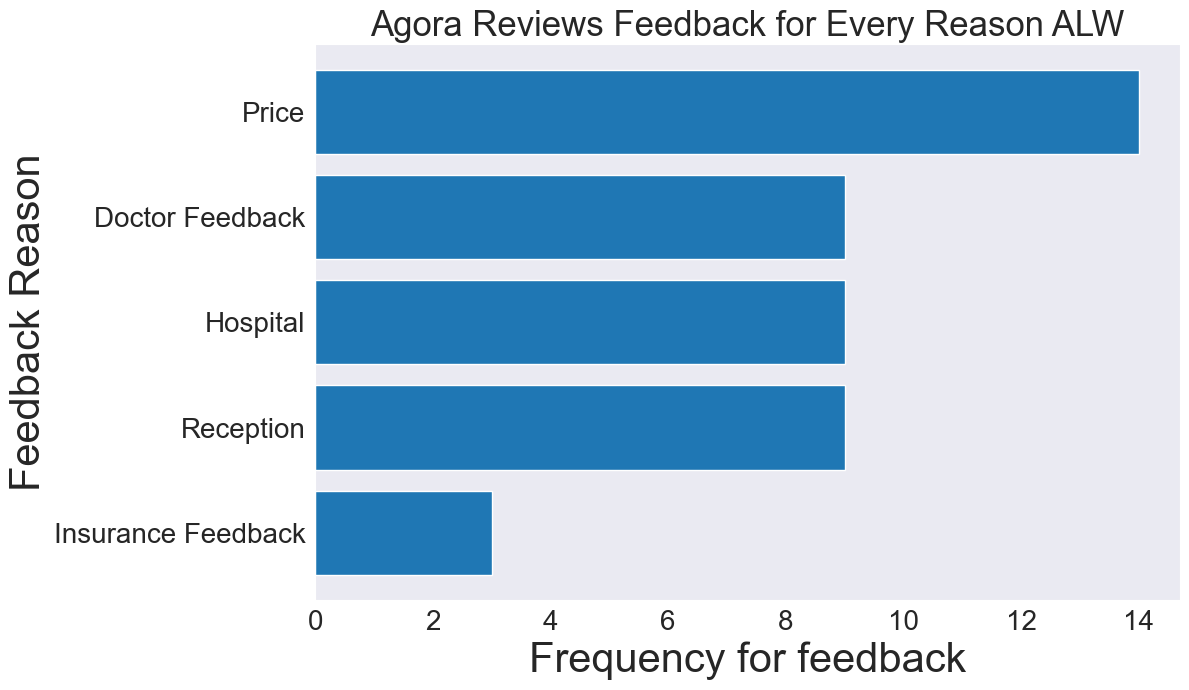

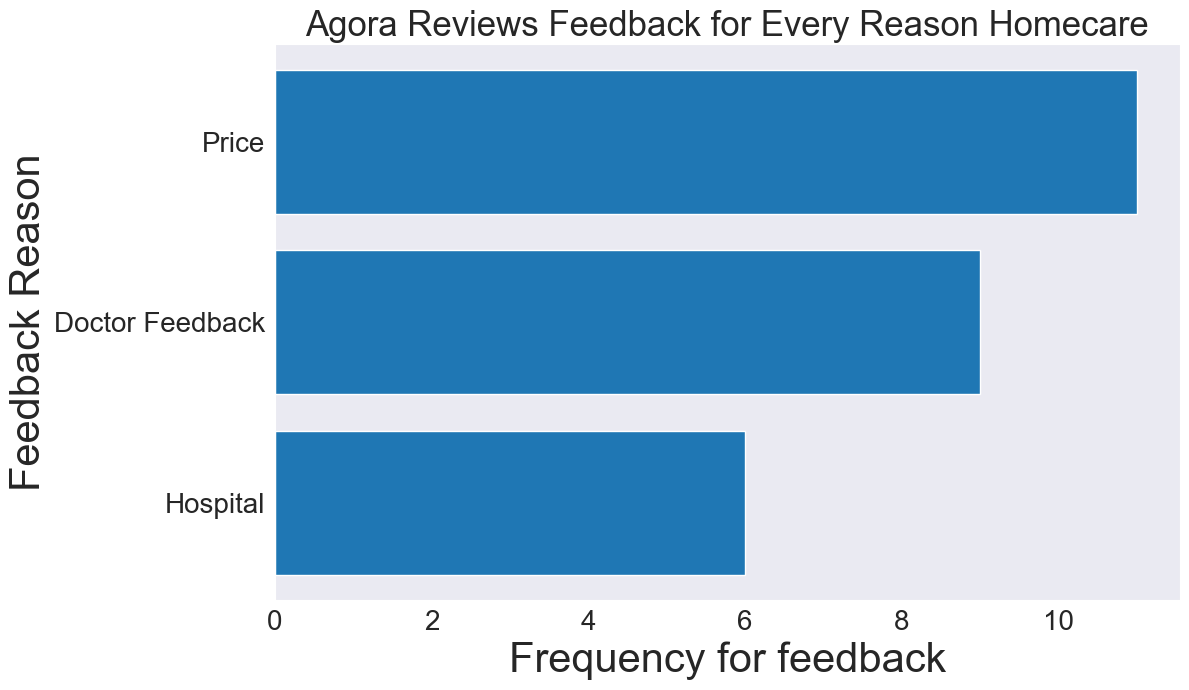

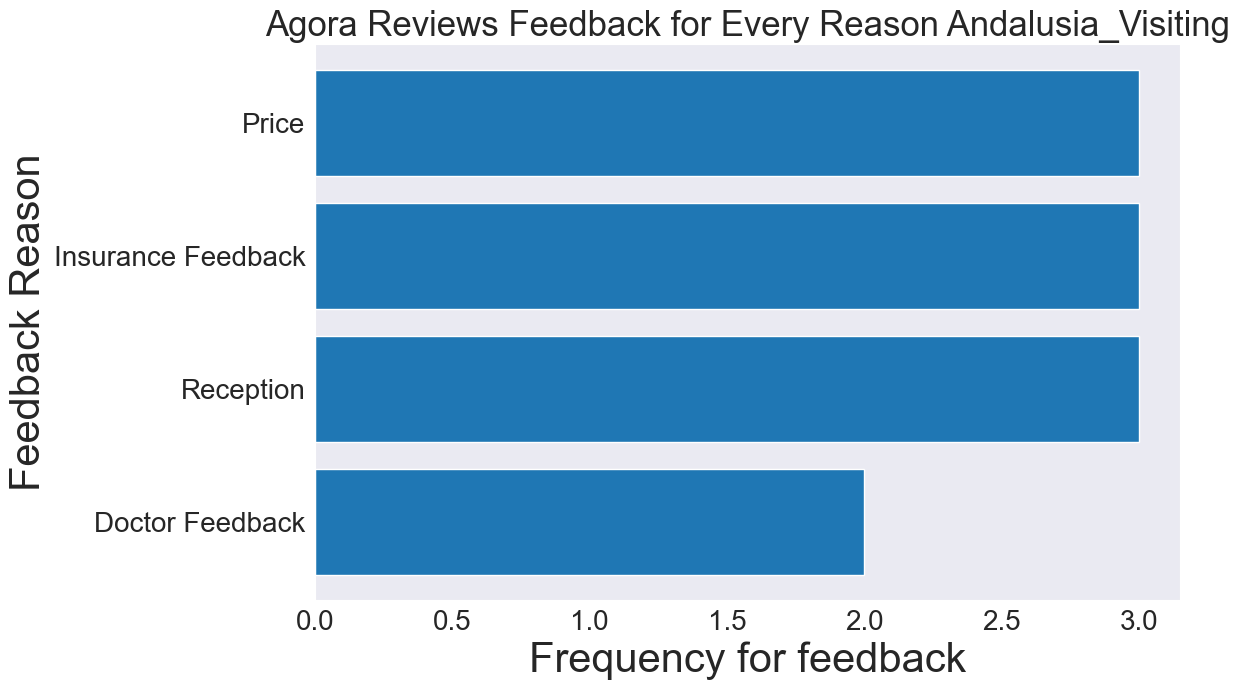

In [55]:
a_c = ['slategray', 'silver','royalblue','darkblue','blue','steelblue','cyan','slateblue','darkslateblue','ivory','peru','khaki', 'violet','orange','yellow']

for bu in set(df['Business Unit'].tolist()):
  hist = 0; recept = 0; time = 0; price = 0;doc = 0; ins = 0; app = 0

  df_sub = df[df['Business Unit']==bu]
  for i in range(len(df_sub['tags'])):
    elem = df_sub['tags'].values[i]
    #value= df_sub['Comments count'].values[i]

    for sub in elem:
        if 'Hospital' in elem:
            hist +=1
        if 'Reception' in elem:
            recept +=1
        if 'WaitTime' in elem:
            time +=1
        if 'Price' in elem:
            price +=1
        if 'Doctor Feedback' in elem:
            doc +=1
        if 'Insurance Feedback' in elem:
            ins +=1
        if 'Appointment' in elem:
            app +=1

  plt.figure(figsize = (12,7))

  values = ['Hospital','Reception','WaitTime','Price','Doctor Feedback','Insurance Feedback','Appointment']
  counts = [hist, recept, time, price,doc,ins,app]

  values, counts = zip(*sorted(zip(values, counts), key=lambda x: x[1], reverse=False))

  values2 = [values[i] for i in range(len(values))  if counts[i] != 0]
  counts2 = [int(count/10) for count in counts if int(count) != 0]

  plt.barh(values2, counts2)
  #plt.barh(['Hospital','Reception','WaitTime','Price'],[hist, recept, time, price],color = a_c[:4])

  title = 'Agora Reviews Feedback for Every Reason ' + bu + ''
  plt.title(title,fontsize=25)
  plt.xlabel('Frequency for feedback',fontsize=30)
  plt.ylabel('Feedback Reason',fontsize=30)
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.tight_layout()

  plt.grid()
  title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Reasons(' + bu + ').png'
  plt.savefig(title)

[2, 6, 7, 21, 22]
[6, 16, 24, 26, 30, 31]
[0, 3, 4, 4]
[3, 3, 8, 13, 13, 20, 22]
[0]
[1, 1]
[6, 14, 21, 22, 23, 31]
[3, 12, 20, 35, 43, 57]
[3, 4, 4, 5, 8]
[3, 9, 9, 9, 14]
[6, 9, 11]
[2, 3, 3, 3]


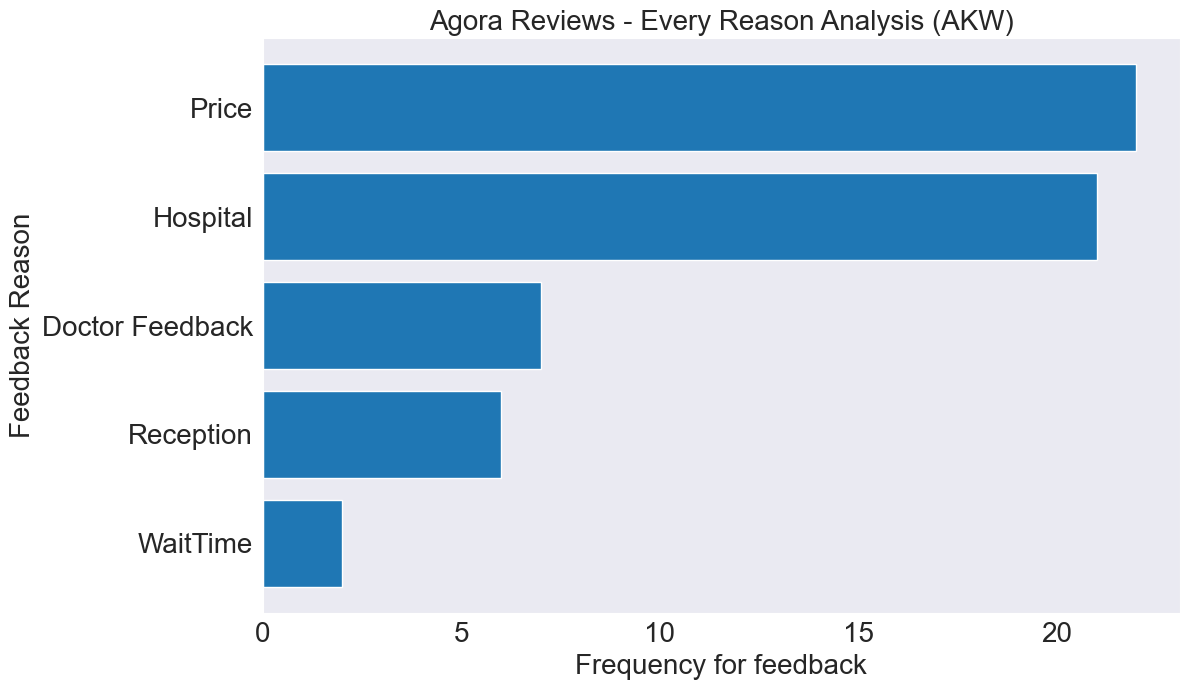

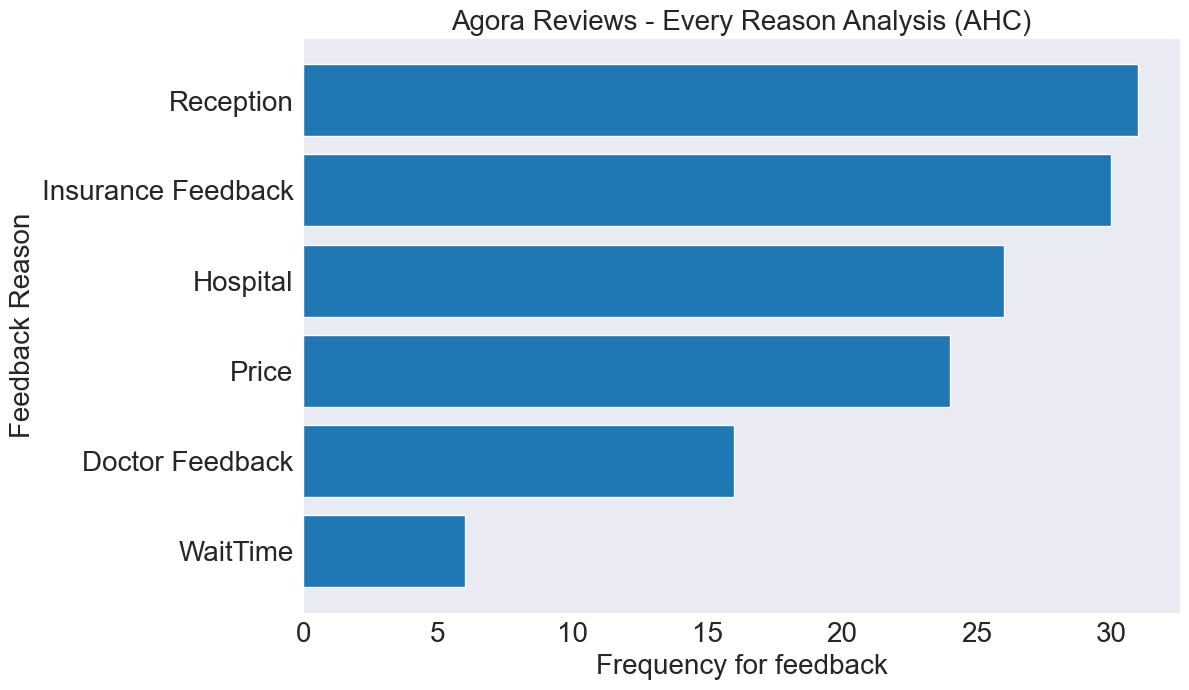

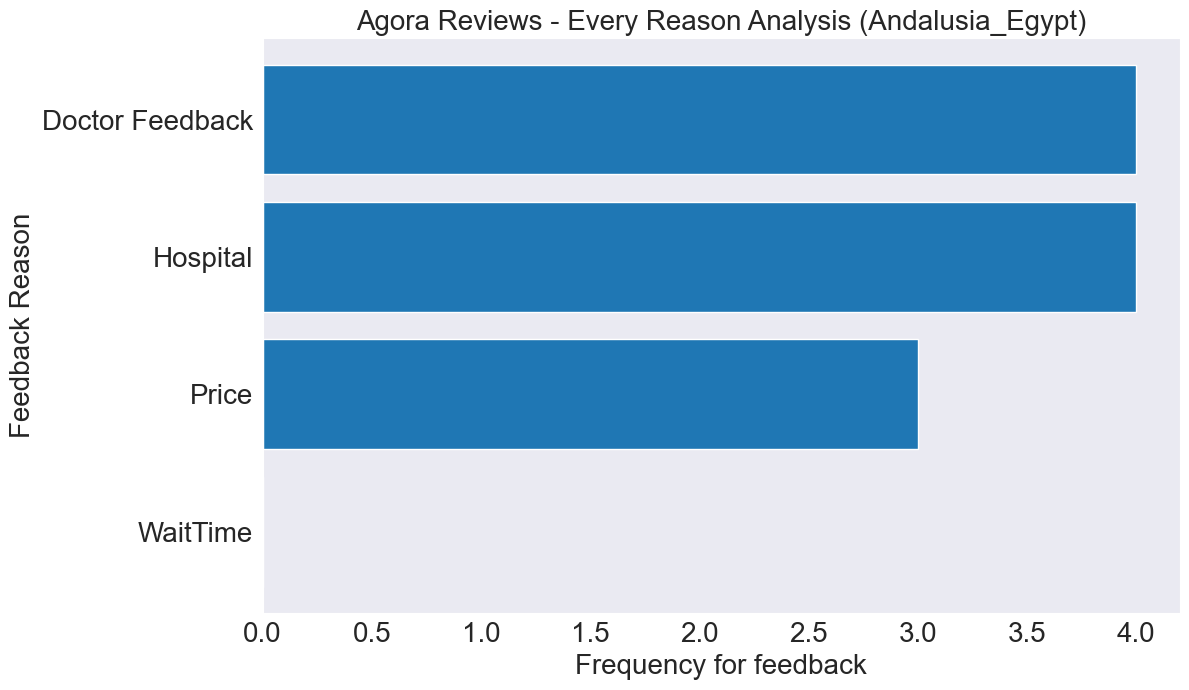

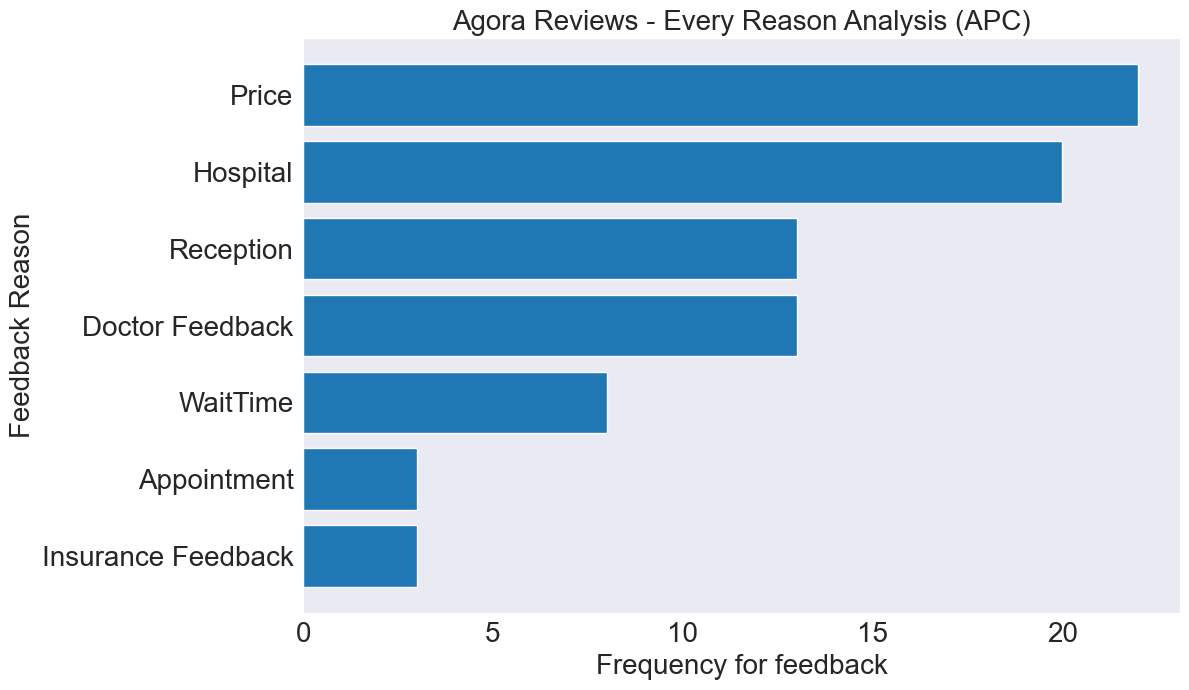

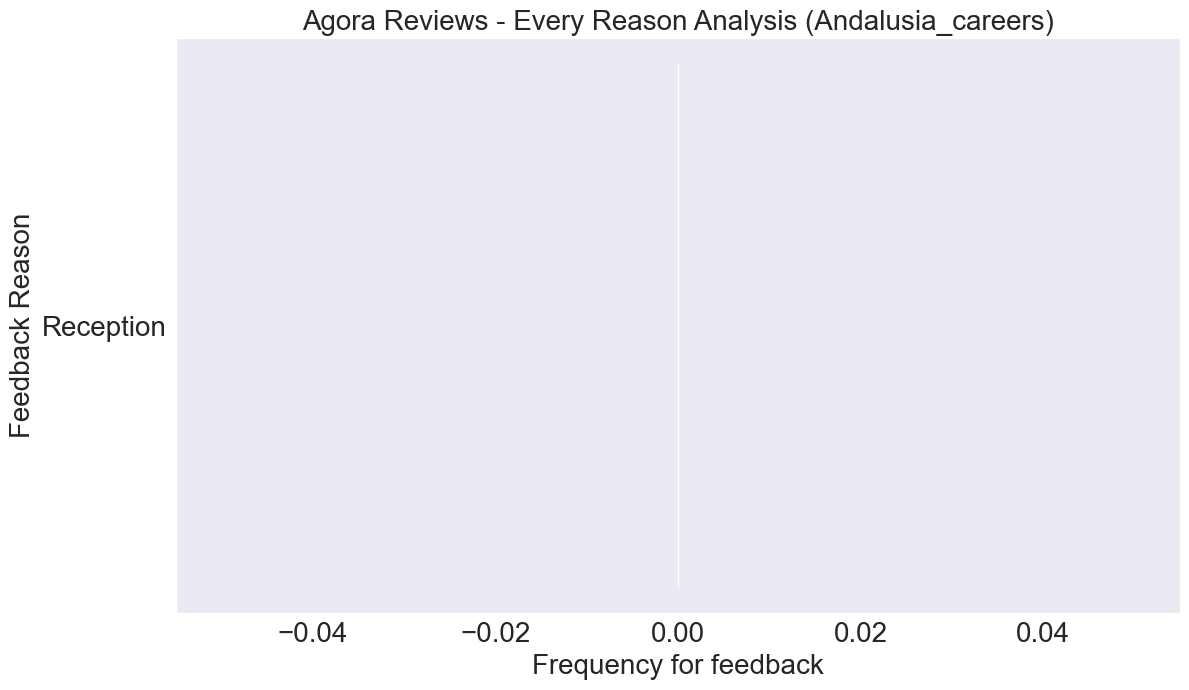

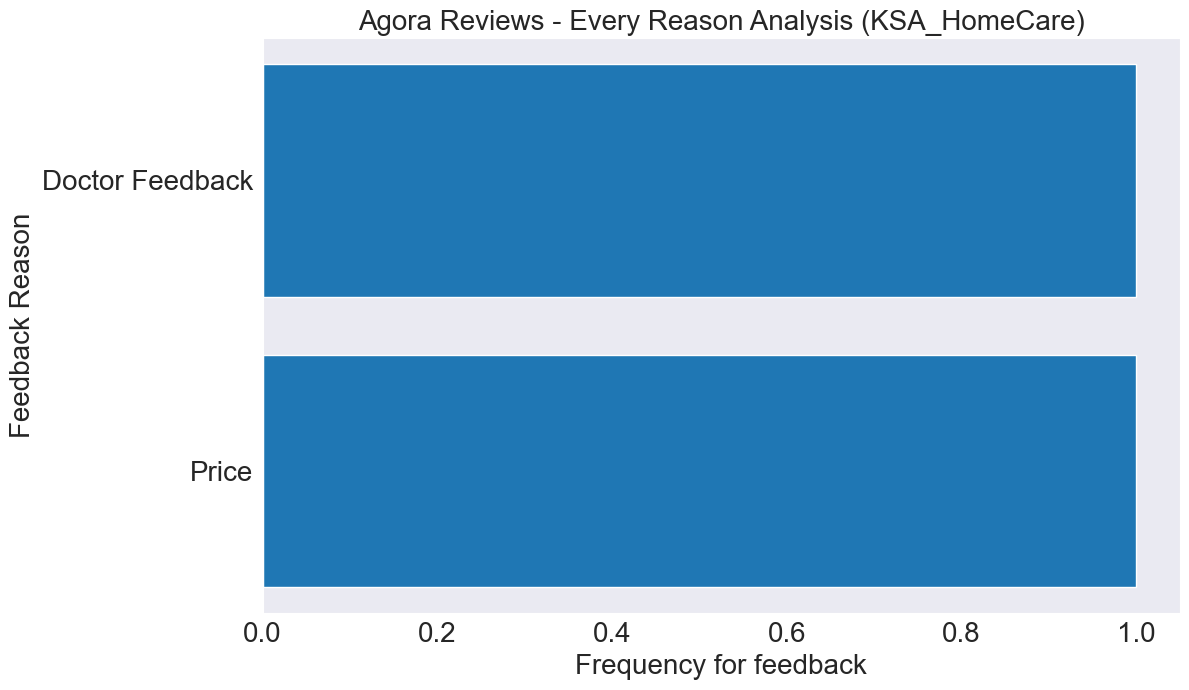

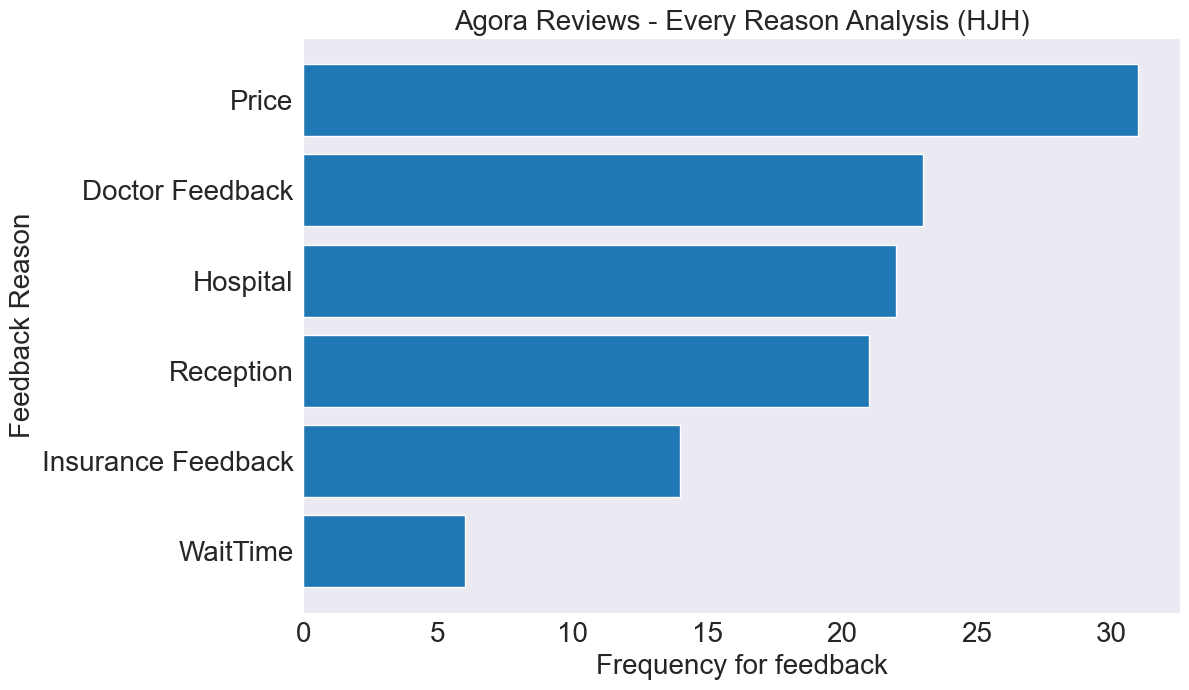

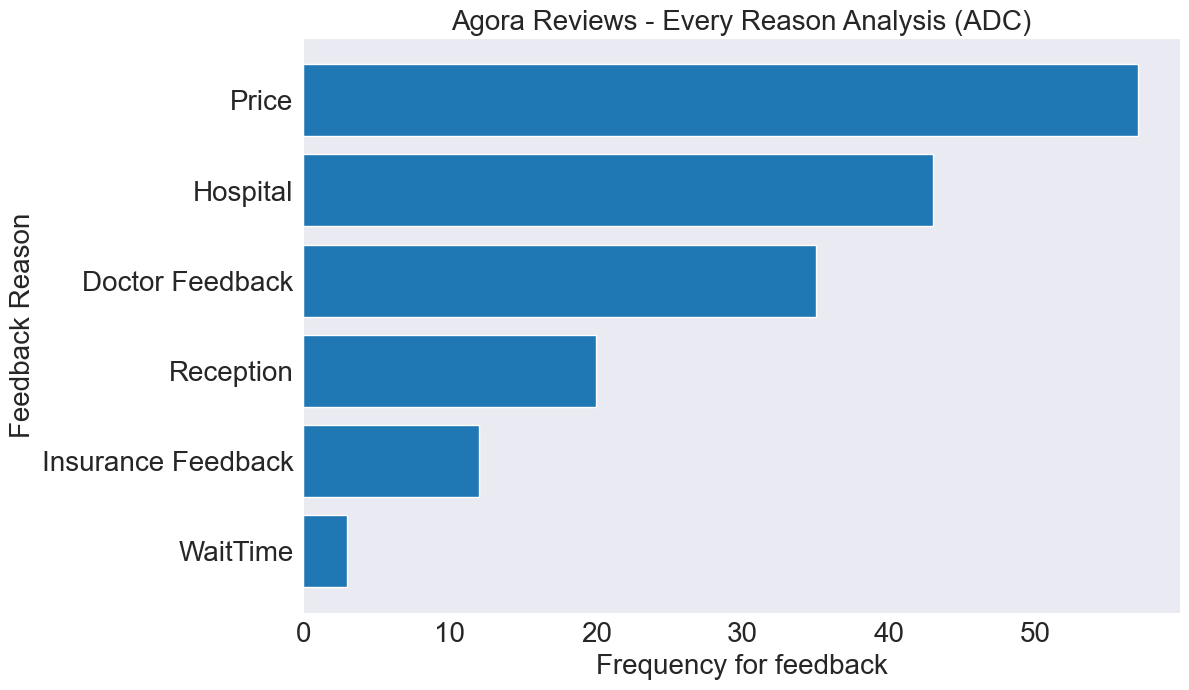

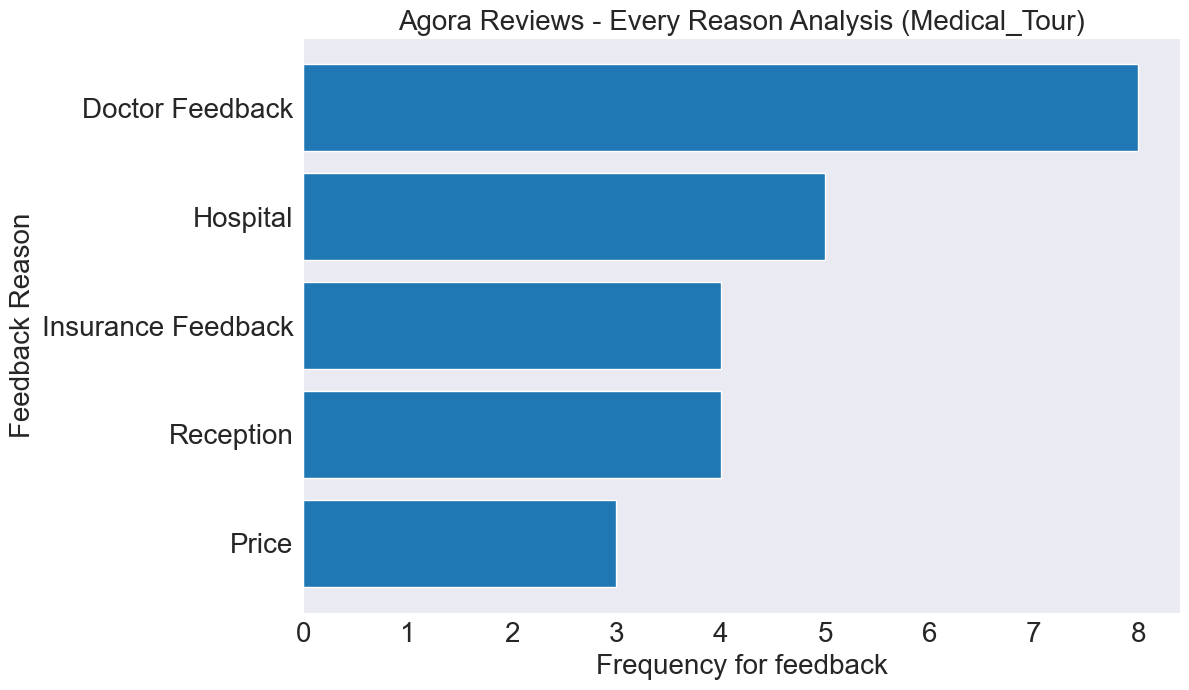

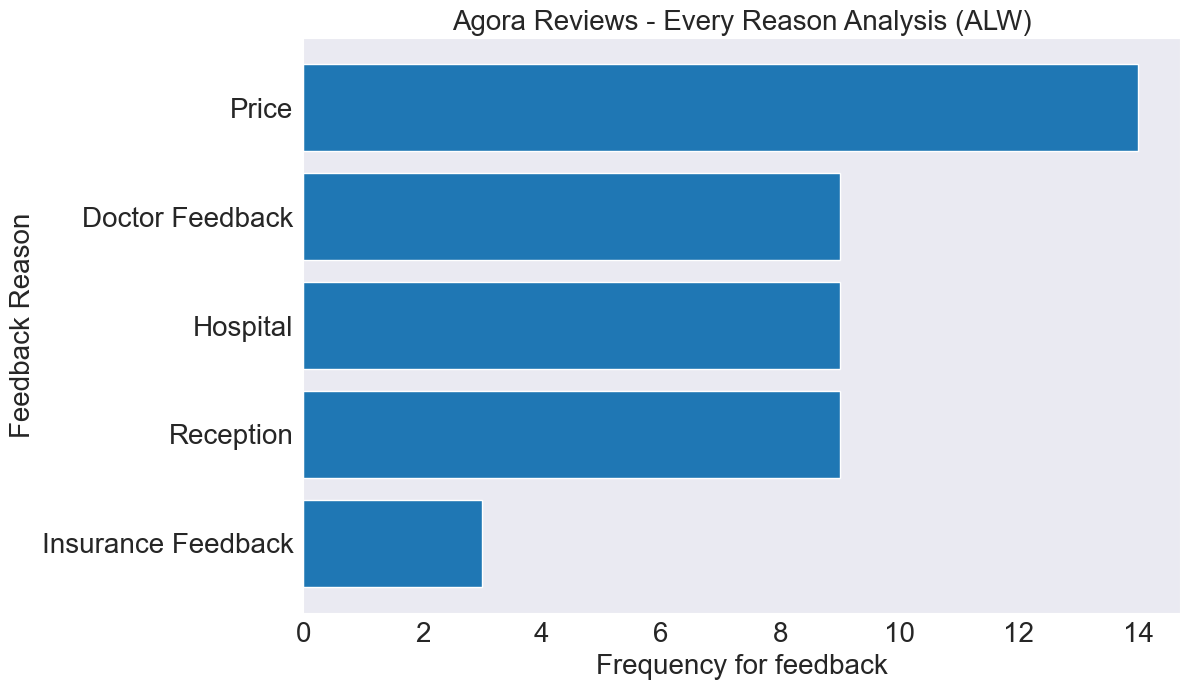

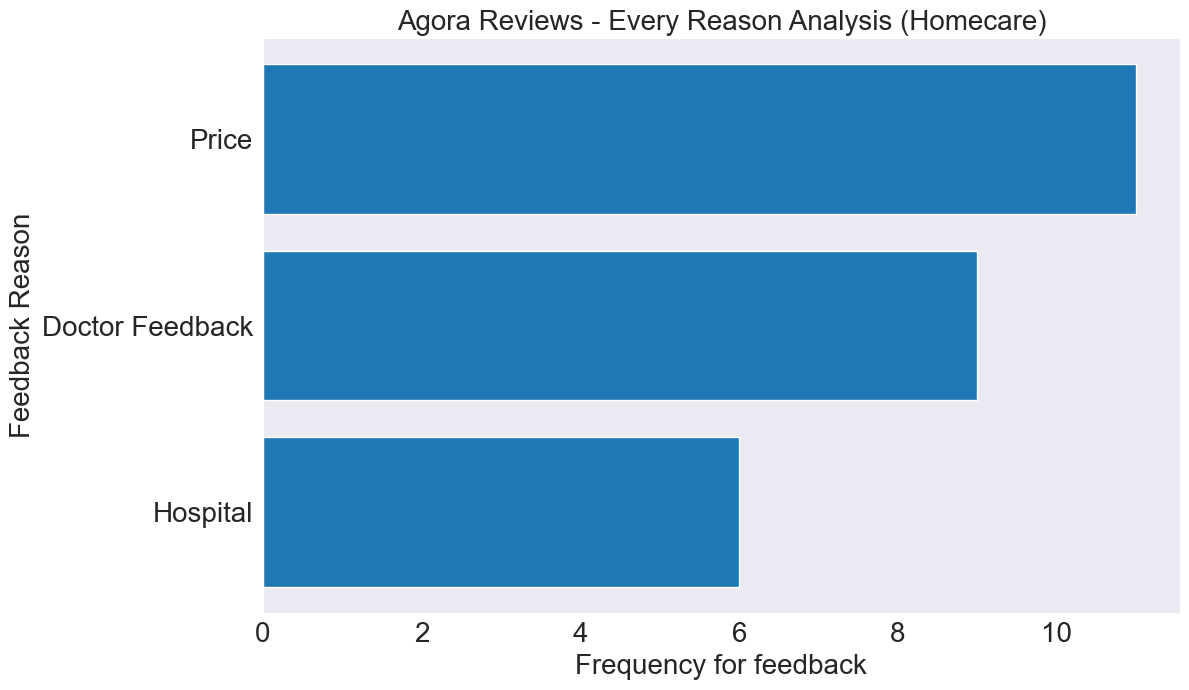

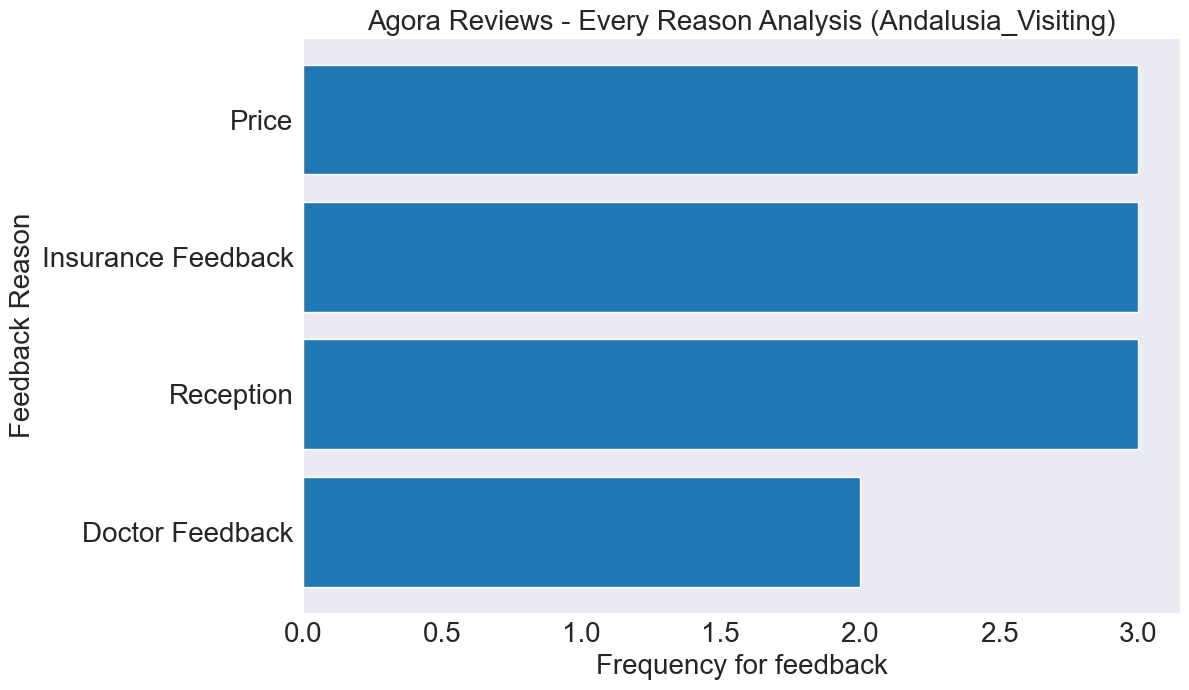

In [56]:
a_c = ['slategray', 'silver','royalblue','darkblue','blue','steelblue','cyan','slateblue','darkslateblue','ivory','peru','khaki', 'violet','orange','yellow']

for bu in list(set(df['Business Unit'].tolist())):
  hist = 0; recept = 0; time = 0; price = 0;doc = 0; ins = 0; app = 0

  df_sub = df[df['Business Unit']==bu]
  for i in range(len(df_sub['tags'])):
    elem = df_sub['tags'].values[i]
    #value= df_sub['Comments count'].values[i]

    for sub in elem:
        if 'Hospital' in elem:
            hist +=1
        if 'Reception' in elem:
            recept +=1
        if 'WaitTime' in elem:
            time +=1
        if 'Price' in elem:
            price +=1
        if 'Doctor Feedback' in elem:
            doc +=1
        if 'Insurance Feedback' in elem:
            ins +=1
        if 'Appointment' in elem:
            app +=1

  plt.figure(figsize = (12,7))

  values = ['Hospital','Reception','WaitTime','Price','Doctor Feedback','Insurance Feedback','Appointment']
  counts = [hist, recept, time, price,doc,ins,app]

  values, counts = zip(*sorted(zip(values, counts), key=lambda x: x[1], reverse=False))

  values2 = [values[i] for i in range(len(values))  if counts[i] != 0]
  counts2 = [int(count/10) for count in counts if count != 0]
  plt.barh(values2, counts2)
  print(counts2)

  #plt.barh(['Hospital','Reception','WaitTime','Price'],[hist, recept, time, price],color = a_c[:4])

  title = 'Agora Reviews - Every Reason Analysis (' + bu + ')'

  plt.title(title,fontsize=20)
  plt.xlabel('Frequency for feedback',fontsize=20)
  plt.ylabel('Feedback Reason',fontsize=20)
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.tight_layout()
  plt.grid()
  title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Reasons(' + bu + ').png'
  plt.savefig(title)

In [28]:
counts2

[3, 3, 8, 10, 13, 19, 20]

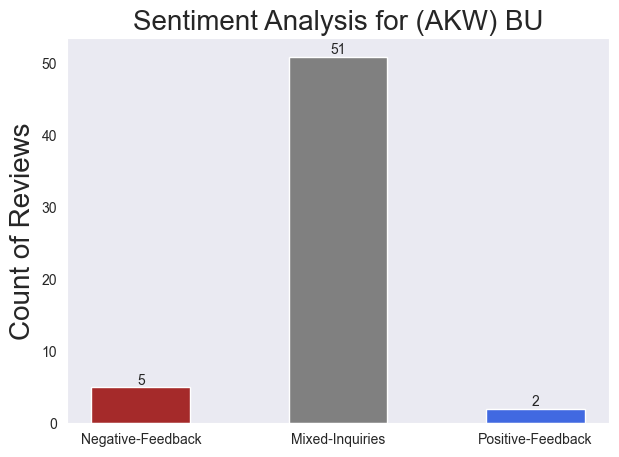

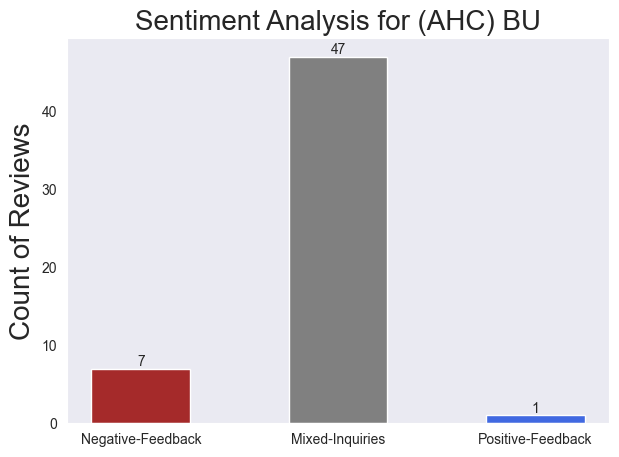

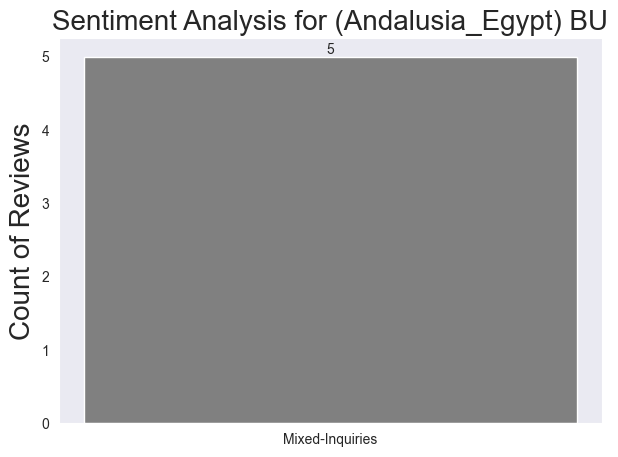

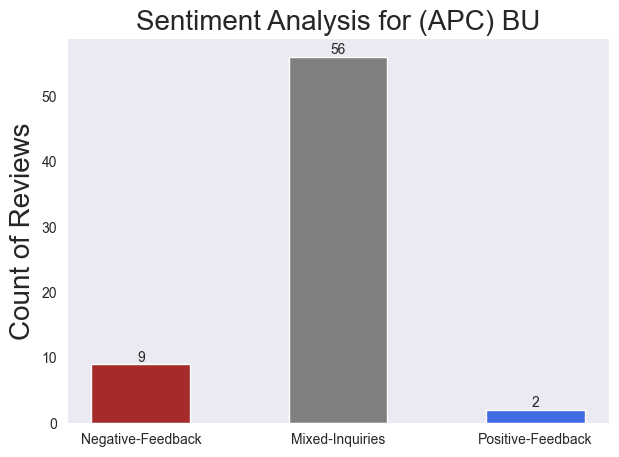

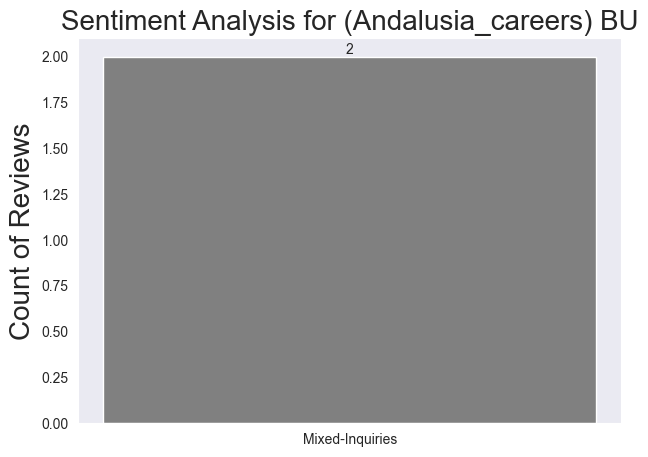

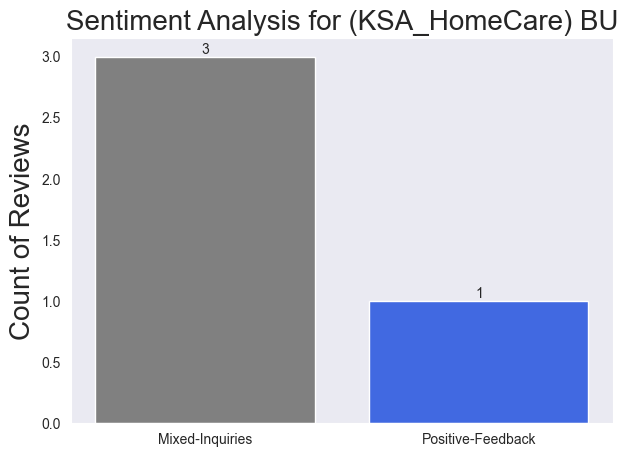

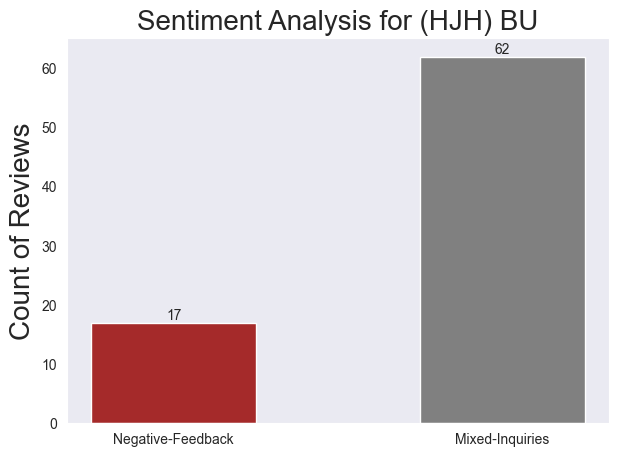

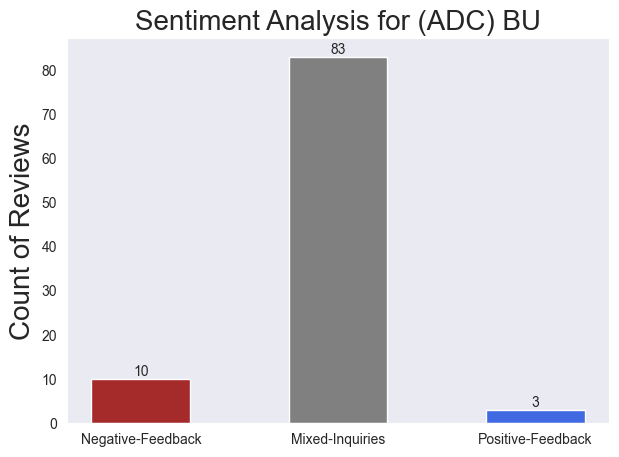

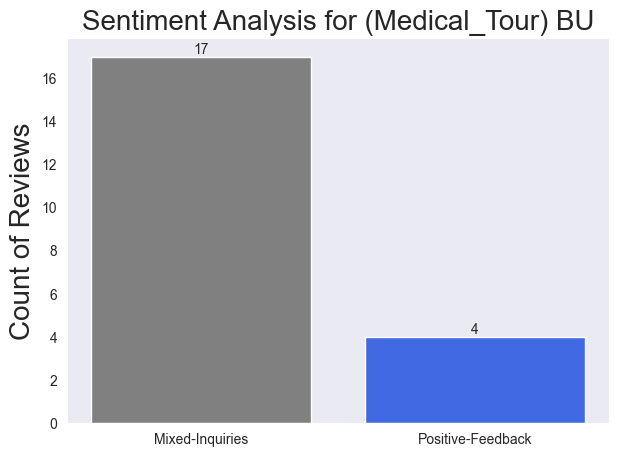

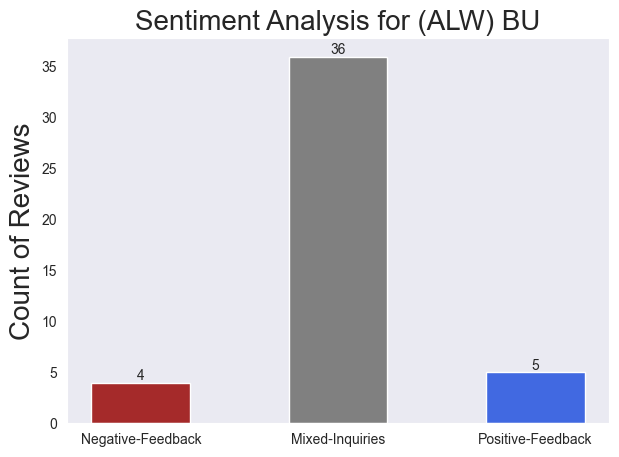

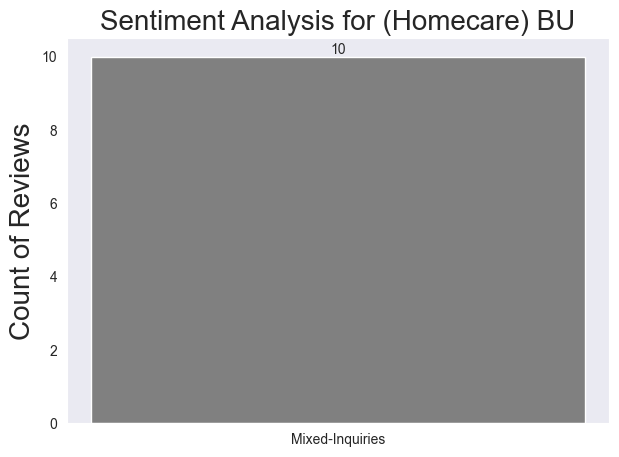

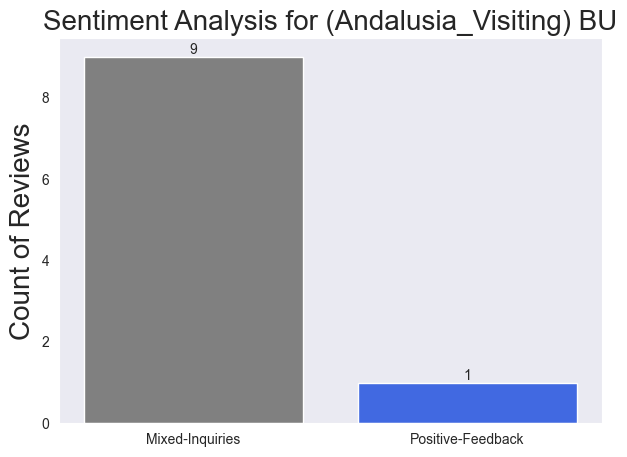

In [67]:

for bu in set(df['Business Unit'].tolist()):
    a_c = ['brown','gray','royalblue']

    a = df[df['Business Unit'] == bu]
    fig,ax=plt.subplots(figsize=(7,5))
    value_counts = {}
    custom_value = 99
    for value in a.ALL_Categories.tolist():
        value_counts[value] = value_counts.get(value, 0) + 1

    value_counts_modified = value_counts.copy()
    for value in value_counts:
        if value in ['Negative-Feedback','Positive-Feedback']:
            value_counts_modified[value] = value_counts[value]
        else:
            value_counts_modified['Mixed-Inquiries'] = value_counts_modified.get('Mixed-Inquiries', 0) + value_counts[value]

    values = [value for value in value_counts_modified.keys() if value in ['Negative-Feedback','Positive-Feedback','Mixed-Inquiries']]
    counts = [value_counts_modified[value] for value in values]

    #values = [value for value in ['Negative-Feedback','Positive-Feedback','Mixed-Inquiries']]
    #counts = [value_counts_modified[value] for value in ['Negative-Feedback','Positive-Feedback','Mixed-Inquiries']]

    values = []; counts = []

    for value in ['Negative-Feedback','Mixed-Inquiries','Positive-Feedback']:
        if value in value_counts_modified and value_counts_modified[value] != 0:
            values.append(value)
            counts.append(value_counts_modified[value])

    if 'Negative-Feedback' in values and 'Positive-Feedback' in values and 'Mixed-Inquiries' not in values:
        plt.bar(values, counts,color=['brown','royalblue'])
    elif 'Negative-Feedback' not in values and 'Positive-Feedback' not  in values and 'Mixed-Inquiries' in values:
        plt.bar(values, counts,color=['gray'])
    elif 'Negative-Feedback' not in values and 'Positive-Feedback' in values and 'Mixed-Inquiries' in values:
        plt.bar(values, counts,color=['gray','royalblue'])
    else:
        plt.bar(values, counts,color=a_c,width=0.5)

    for container in ax.containers:
        ax.bar_label(container)

    plt.ylabel('Count of Reviews',fontsize=20)
    title = 'Sentiment Analysis for (' + bu + ') BU'
    plt.title(title,fontsize=20)

    plt.grid()
    title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Sentiments(' + bu + ').png'
    plt.savefig(title)

In [68]:
#a_c = ['brown','royalblue']
values_all = []; bus = []
rows=[]
for bu in set(df['Business Unit'].tolist()):
    df_bu = df[df['Business Unit'] == bu]

    a1 = df_bu[df_bu['ALL_Categories'] == 'Negative-Feedback']
    num_neg =  len(a1)

    b = df_bu[df_bu['ALL_Categories'] != 'Negative-Feedback']
    num_pos =  len(b)

    rows.append([bu,'Positive (Mixed Inquiries)',num_pos])
    rows.append([bu,'Negative',num_neg])

In [69]:
df2 = pd.DataFrame(rows,columns=['BU','Sentiment','Count'])

In [70]:
df2.head()

,BU,Sentiment,Count
0,AKW,Positive (Mixed Inquiries),43
1,AKW,Negative,5
2,AHC,Positive (Mixed Inquiries),39
3,AHC,Negative,7
4,Andalusia_Egypt,Positive (Mixed Inquiries),4


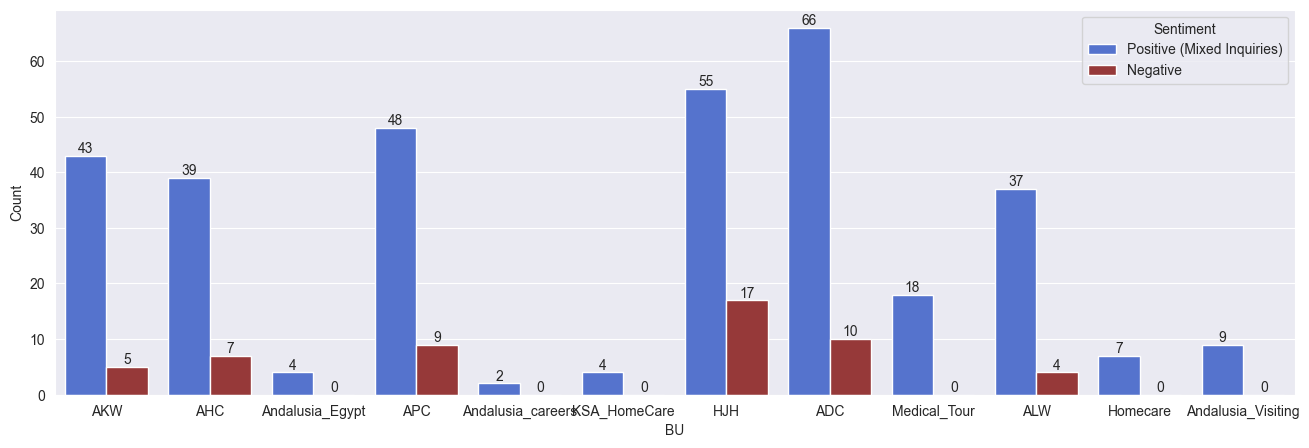

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(16,5))
sns.barplot(df2,x='BU',y='Count',hue = 'Sentiment',palette=['royalblue','brown'],ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(title)

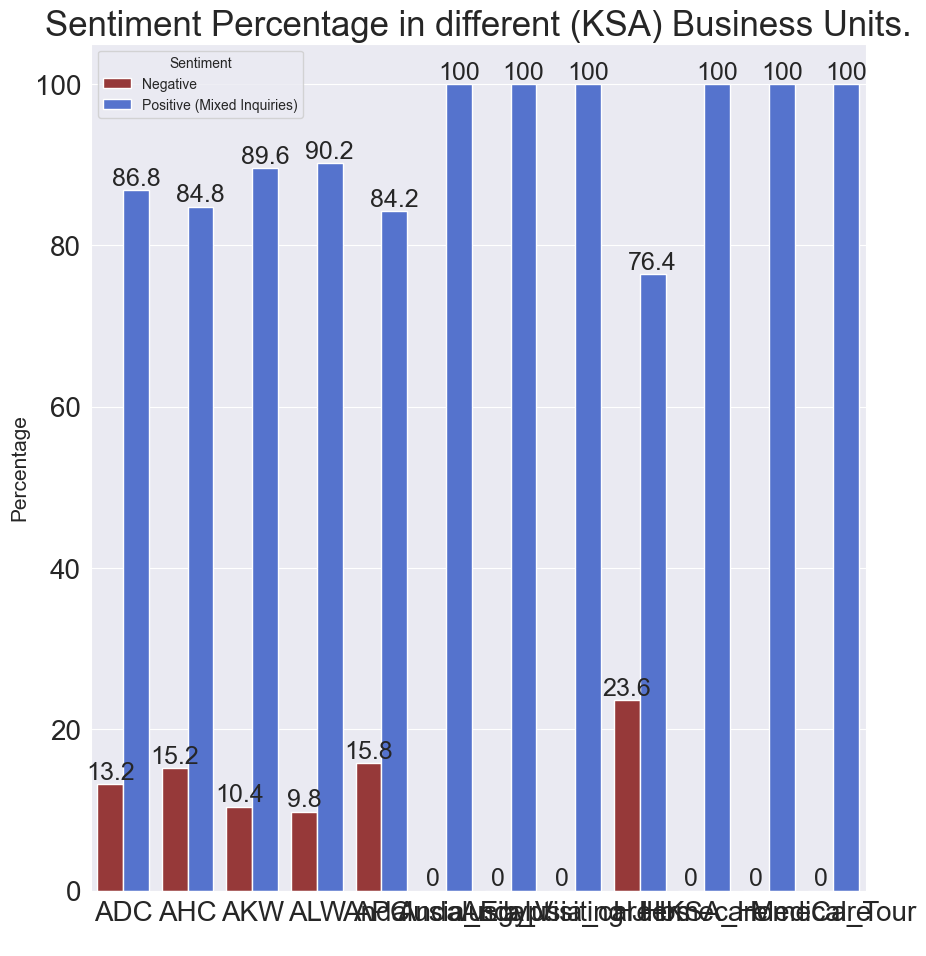

In [80]:
grouped_data = df2.groupby(['BU', 'Sentiment'])['Count'].sum().reset_index()
grouped_data['Percentage'] = grouped_data.groupby('BU')['Count'].transform(lambda x: ((x / x.sum()) * 100))
grouped_data['Percentage'] = grouped_data['Percentage'].round(1)

fig,ax=plt.subplots(figsize=(10,11))
sns.barplot(data=grouped_data, x='BU', y='Percentage', hue='Sentiment', palette=['brown','royalblue'], ax=ax)

for container in ax.containers:
    ax.bar_label(container,fontsize=18)
plt.title('Sentiment Percentage in different (KSA) Business Units.',fontsize=25)

plt.xlabel(' ')
plt.ylabel('Percentage',fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Sentiments.png'
plt.savefig(title)

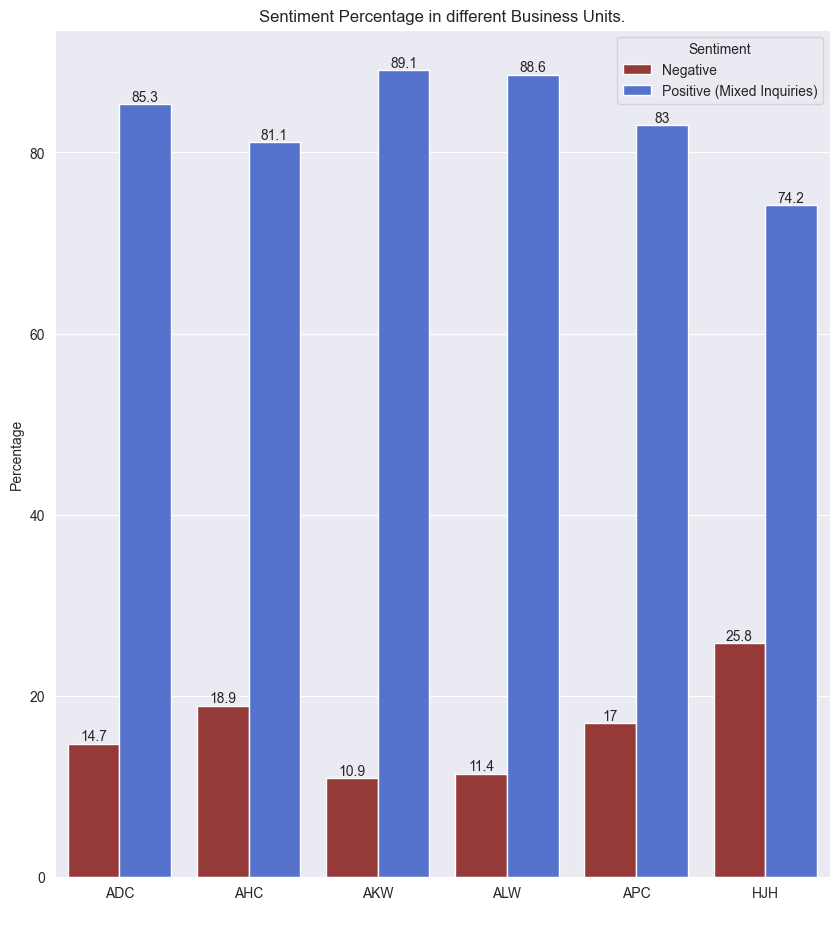

In [51]:
grouped_data = df2.groupby(['BU', 'Sentiment'])['Count'].sum().reset_index()
grouped_data['Percentage'] = grouped_data.groupby('BU')['Count'].transform(lambda x: ((x / x.sum()) * 100))
grouped_data['Percentage'] = grouped_data['Percentage'].round(1)

fig,ax=plt.subplots(figsize=(10,11))
sns.barplot(data=grouped_data, x='BU', y='Percentage', hue='Sentiment', palette=['brown','royalblue'], ax=ax)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Sentiment Percentage in different Business Units.')
plt.xlabel(' ')
title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Sentiments.png'
plt.show()

In [25]:
grouped_2 = grouped_data.drop(columns = ['Count'])
grouped_2

,BU,Sentiment,Percentage
0,ADC,Negative,14.7
1,ADC,Positive (Mixed Inquiries),85.3
2,AHC,Negative,18.9
3,AHC,Positive (Mixed Inquiries),81.1
4,AKW,Negative,10.9
5,AKW,Positive (Mixed Inquiries),89.1
6,ALW,Negative,11.4
7,ALW,Positive (Mixed Inquiries),88.6
8,APC,Negative,17.0
9,APC,Positive (Mixed Inquiries),83.0


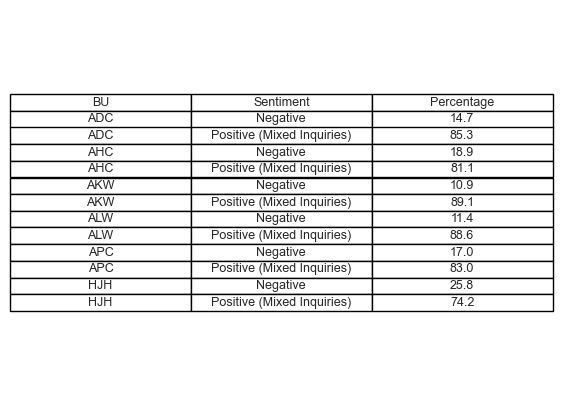

In [63]:
#fig, ax = plt.subplots()
fig,ax=plt.subplots(figsize=(7,5))

ax.axis('off')
ax.table(cellText=grouped_2.values,
         colLabels=grouped_2.columns,
         loc='center',
         cellLoc='center')

title = 'Extracted SocialMediaComments/Assignments/ExtractedPic/Agora_Reviews_Sentiments_table.png'
plt.savefig(title)